<a href="https://colab.research.google.com/github/AlexandraLutaya/Diabetes-datasets-analysis/blob/main/Research_diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Проект: Исследование причин возникновения диабета**

Получены три набора данных содержащие данные с медицинскими наблюдениями.

Были поставлены следующие задачи:


1.   Загрузить файлы с данными
2.   Провести предподготовку данных в файлах
3.   Провести исследовательский анализ и сделать общие выводы
4.   Выделить причины возникновения диабета



## Загрузка библиотек и написание собственных функций

In [1]:
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 9.2 MB/s eta 0:00:00


In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from phik import phik_matrix

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore', module='pandas')

Для уменьшения шанса ошибки и, в случае ее возникновения, локализации в одном месте, пропишем функции для исследовательского анализа. Настроим вывод всех необходимых данных.

In [3]:
#функция для исследовательского анализа количественных данных
#функция принимает количественные данные
def analisys_num(data):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    #настраиваем построение гистограммы
    axes[0].hist(data, bins=20)
    axes[0].set_title('Гистограмма показателя')
    axes[0].set_xlabel('Значения показателя')
    #визуально выводим среднее значение и медиану
    axes[0].axvline(data.median(), color='b', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mean(), color='r', linestyle='-', linewidth=2)
    axes[0].legend(['Медиана', 'Среднее'], prop={'size': 6})

    #постройка боксплота для данных
    axes[1].set_title('Боксплот показателя')
    axes[1].boxplot(data)
    #настройка скрипичной диаграммы
    axes[2].set_title('Скрипичная диаграмма показателя')
    axes[2].violinplot(dataset = [data], vert=False, widths=0.75,
                       showmeans=True, showmedians=True)
    plt.tight_layout()
    plt.show()
    #выводим статистику по показателю
    print('Показатели описательной статистики')
    print(data.describe())

In [4]:
#в случае, если для данных не построить боксплот в классическом диапазоне
#применим логарифмическое преобразование
def analisys_num_2(data):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    #настраиваем построение гистограммы
    axes[0].hist(data, bins=20)
    axes[0].set_title('Гистограмма показателя', fontsize=8)
    axes[0].set_xlabel('Значения показателя')
    #выводим среднее значение и медиану
    axes[0].axvline(data.median(), color='b', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mean(), color='r', linestyle='-', linewidth=2)
    axes[0].legend(['Медиана', 'Среднее'], prop={'size': 6})

    non_zero_data = data[data != 0].dropna().values
    log_data = np.log(non_zero_data)
    axes[1].boxplot(log_data, vert=False)
    axes[1].set_title('Боксплот показателя после логарифмического преобразования', fontsize=8)

    #выводим скрипичную диаграмму
    axes[2].violinplot(dataset=[log_data], vert=False, widths=0.75,
                       showmeans=True, showmedians=True)
    axes[2].set_title('Скрипичная диаграмма показателя', fontsize=8)
    axes[2].set_xlabel('Логарифмированные значения')
    axes[2].set_yticks([])

    plt.tight_layout()
    plt.show()
    print('Показатели описательной статистики')
    print(data.describe())

In [5]:
#если уникальных категориальных данных меньше или равно 3, используем эту функцию
#функция для исследовательского анализа качественных данных и построение круговой диаграммы
#функция принимает данные и считает их количество внутри каждого уникального значения,
#после выводит круговой график
def analisys_cat_pie(data):
    data.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(5, 5))
    plt.title('Круговая диаграмма показателя', size=10)
    plt.show()

In [6]:
#если уникальных категориальных данных более 3, используем эту функцию
#функция для исследовательского анализа качевтенных данных и построение столбчатой диаграммы
#функция принимает данные и считает их количество внутри каждого уникального значения,
#после выводит столбчатую диаграмму
def analisys_cat_plot(data):
    data.value_counts(ascending=True).plot(kind='bar', alpha=0.8)
    plt.title('Столбчатая диаграмма', size=15)
    plt.xlabel('Количество', size=12)
    plt.ylabel('Значения', size=12)
    plt.show()

In [7]:
#функция для вывода графика Lmplot
#функция принимает датасет и названия столбцов, по которым надо построить график
def grafic(data, x, y):
    sns.lmplot(x=x, y=y, data=data)
    plt.title(f'Зависимость показателя {y} от показателя {x}', size=10)
    plt.xlabel(f'Показатель {x}', size=8)
    plt.ylabel(f'Показатель {y}', size=8)
    plt.show()

In [8]:
#функция для изучения данных на аномальные значения (грубые выбросы)
def anomaly(data):
  #выводим размер датасета
  print(f'Размер файла:{data.shape}')
  print('-'*100)
  #для вывода всех столбцов создаем цикл
  #выделяем в отдельную переменную названия столбцов
  column_data= data.columns
  #циклом перебираем все значения и выводим данные
  for c in column_data:
    #выводим все уникальные значения
    print(f'Уникальные значения показателя: {c}')
    print(data[c].unique())
    #считаем количесвто уникальных значений
    print(f'Количество уникальных значений: {data[c].nunique()}')
    #считаем количесвто всех значений
    print(f'Количество всех значений: {data[c].count()}')
    print('-'*100)

## Анализ датасета diabetes

Согласно информации указанной на сайте Kaggle, датафайл содержит следующие столбцы:

Pregnancies: количество беременностей

Glucose: Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе

BloodPressure: диастолическое артериальное давление (мм рт.ст.)

SkinThickness: Толщина кожной складки на трехглавой мышце (мм)

Insulin: 2-часовой сывороточный инсулин (мкг/мл)

BMI: Индекс массы тела (вес в кг/(рост в м)^2)

DiabetesPedigreeFunction: Предрасположенность к диабету

Age: Возраст (года)

Outcome: Вариабильность (0 или 1)

In [9]:
! gdown --id 1xrniaFFc73PUQ70Cj5-xUDY9cJ5OxpRG

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xrniaFFc73PUQ70Cj5-xUDY9cJ5OxpRG
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 40.4MB/s]


In [10]:
#загрузим датасет
try:
  diabetes=pd.read_csv('/content/diabetes.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  diabetes=pd.read_csv('/diabetes.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
diabetes.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

Выводы: необходимо привести столбцы к единому виду, так же изучить файл на наличие пропусков и явных дублей.

### Предобработка датасета diabetes

In [13]:
#приведем названия столбцов к нужному виду
diabetes = diabetes.rename(columns = {'BloodPressure':'Blood_Pressure',
                                      'SkinThickness':'Skin_Thickness',
                                      'DiabetesPedigreeFunction':'Diabetes_Pedigree_Function'})
diabetes.columns = map(str.lower, diabetes.columns)
diabetes.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

In [14]:
#проверим на наличие пропусков
diabetes.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [15]:
#проверим наличие явных дубликатов
diabetes.duplicated().sum()

0

In [16]:
anomaly(diabetes)

Размер файла:(768, 9)
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Количество уникальных значений: 17
Количество всех значений: 768
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Количество уникальных

В датасете нет пропусков или явных дубликатов. При первичном исследовании данных нет отрицательных чисел или аномально больших чисел. Но в bmi обнаружено значени 0. Учитывая формулу расчета индекса массы тела, данное значение физически получить нельзя. Так же в других показателях, получаемых из анализа крови невозмодно получить значение 0 у живого человека. Изучим эти данные в рамках исследовательского анализа. Возможно это опечатки и их необходимо заменить Nan или заглушкой "no_information".

### Исследовательский анализ файла diabetes

In [17]:
diabetes.shape

(768, 9)

In [18]:
diabetes_num = ['pregnancies', 'glucose',
                'blood_pressure', 'skin_thickness', 'insulin',
                'diabetes_pedigree_function', 'age']

Анализ показателя pregnancies


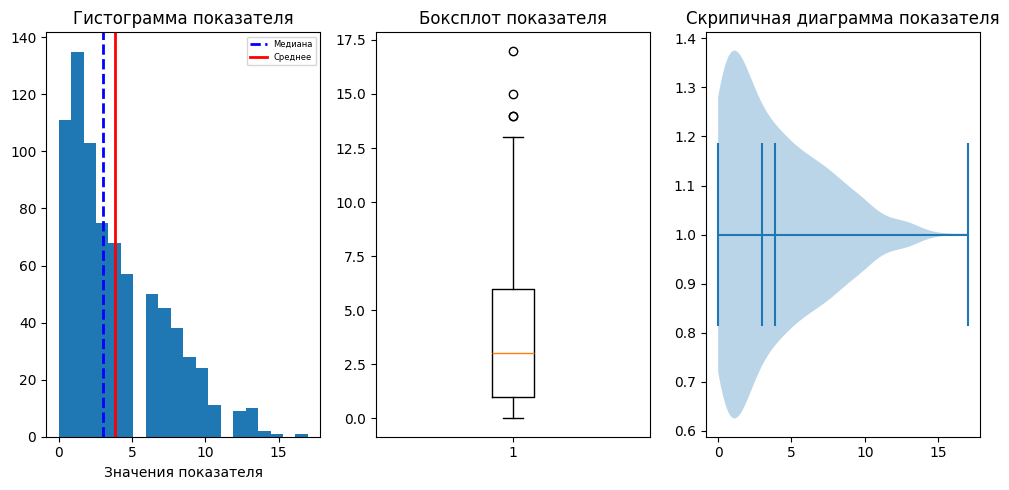

Показатели описательной статистики
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnancies, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя glucose


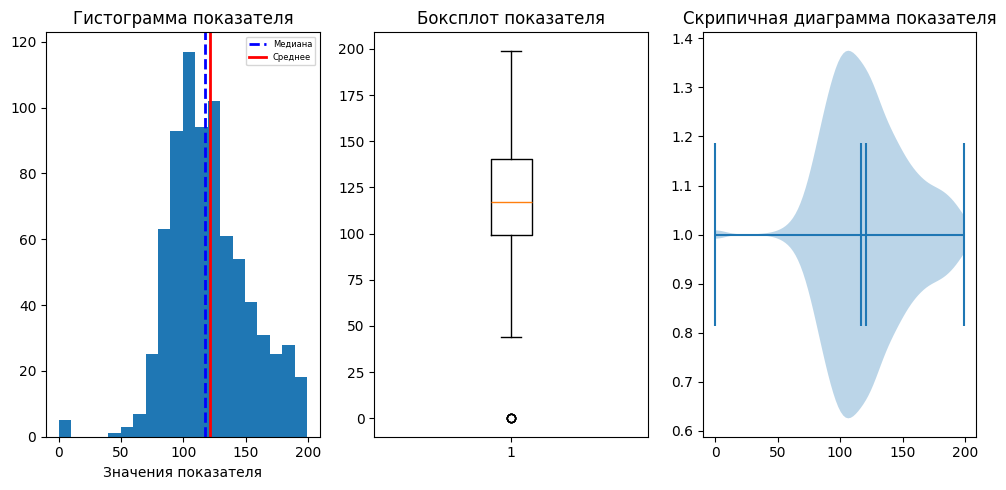

Показатели описательной статистики
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: glucose, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя blood_pressure


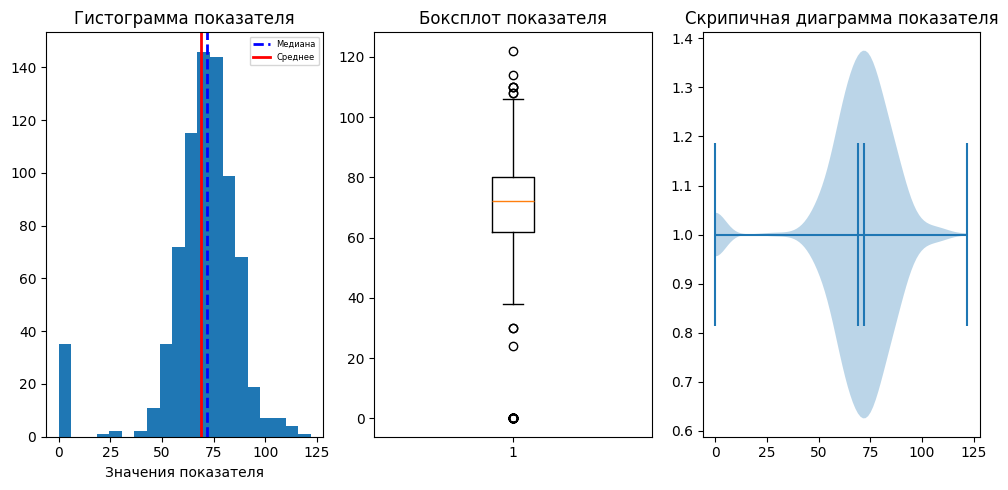

Показатели описательной статистики
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: blood_pressure, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя skin_thickness


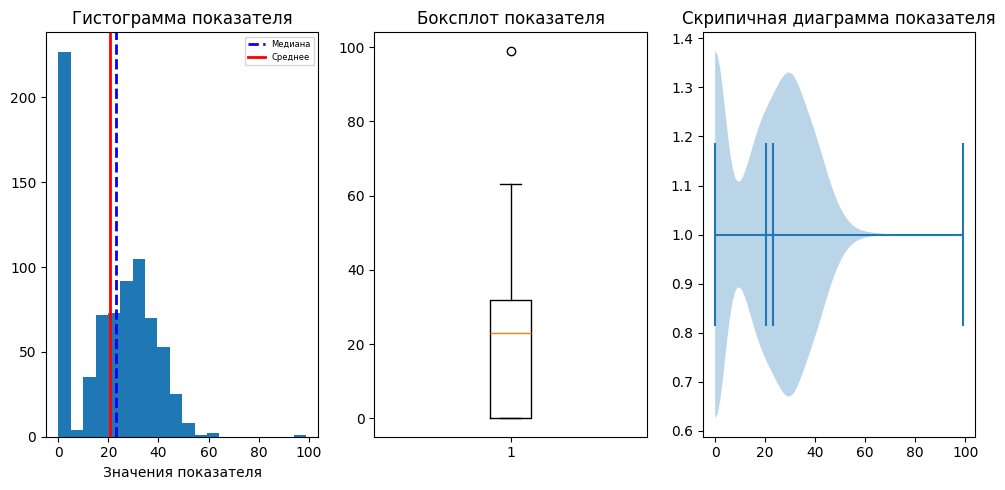

Показатели описательной статистики
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: skin_thickness, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя insulin


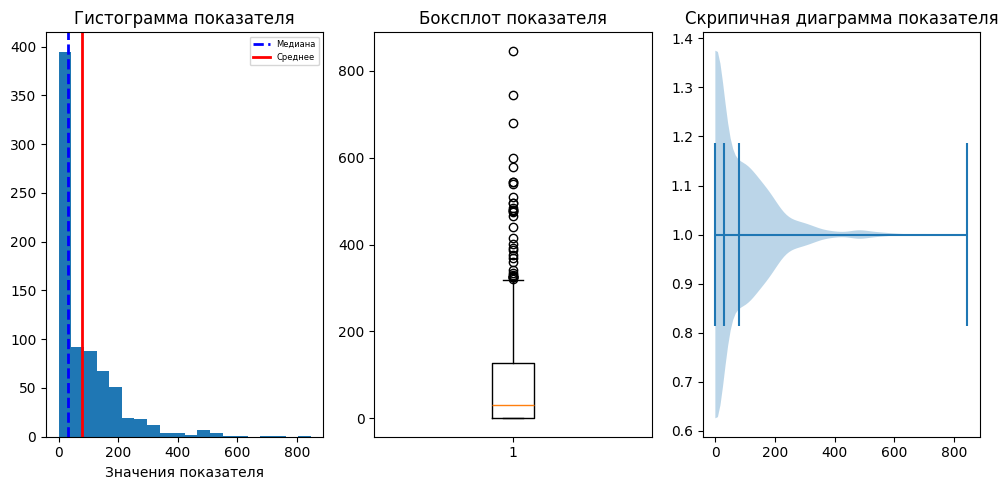

Показатели описательной статистики
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя diabetes_pedigree_function


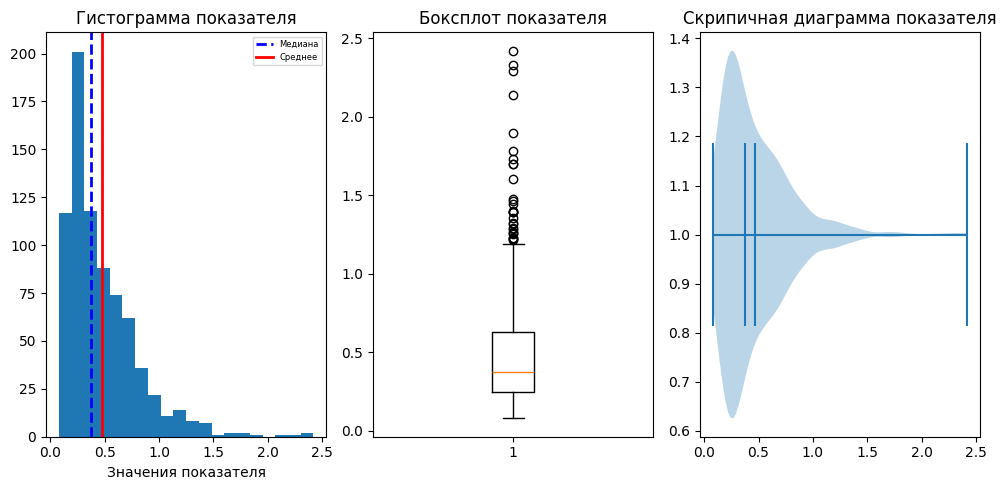

Показатели описательной статистики
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: diabetes_pedigree_function, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя age


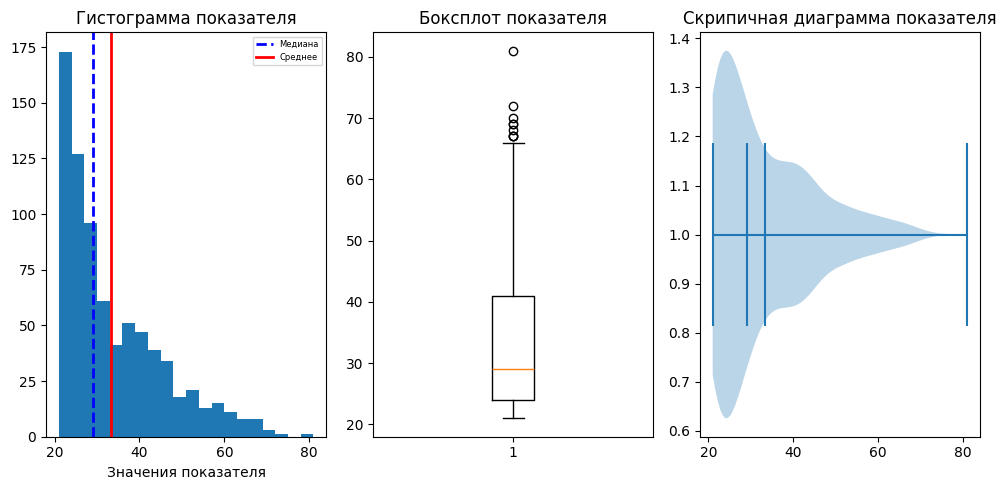

Показатели описательной статистики
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------


In [19]:
for num in diabetes_num:
  print(f'Анализ показателя {num}')
  analisys_num(diabetes[num])
  print('-'*100)

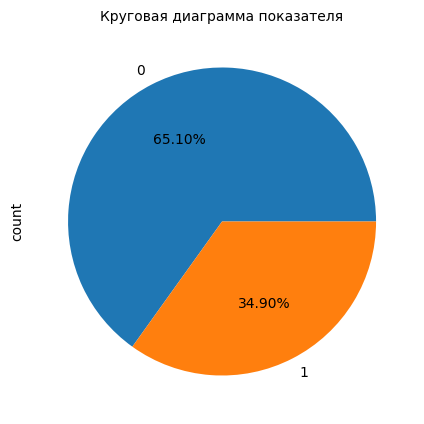

In [20]:
analisys_cat_pie(diabetes['outcome'])

В большинстве распределения близки к нормальным, но есть показатели с двумя вершинами (кровяное давление). По показателю вариабельность есть сдвиг в сторону 0, то есть 65 % не имеет диагноза диабет.  Наблюдаются выбросы в данных. Изучим количество нулевых точек.

In [21]:
zero_count = {}

for column in diabetes.columns:
  zero = 0

  for z in diabetes[column]:
    if z == 0:
      zero+= 1
  zero_count[column] = zero

print(zero_count)

{'pregnancies': 111, 'glucose': 5, 'blood_pressure': 35, 'skin_thickness': 227, 'insulin': 374, 'bmi': 11, 'diabetes_pedigree_function': 0, 'age': 0, 'outcome': 500}


Учитывая количество нулевых значений в показателях, удалять их из данных нельзя. Это приведет к сдвигу данных, в связи с этим заменим во всех показателях 0 на Nan, кроме количества беременностей и вариабельности.

In [22]:
zero_re = ['glucose', 'blood_pressure',
           'skin_thickness', 'insulin',
           'bmi']

for col in zero_re:
    diabetes[col] = diabetes[col].replace(0, np.nan)

diabetes.isna().sum()

pregnancies                     0
glucose                         5
blood_pressure                 35
skin_thickness                227
insulin                       374
bmi                            11
diabetes_pedigree_function      0
age                             0
outcome                         0
dtype: int64

Целевым является столбец outcome. Построим корреляционную матрицу и рассмотрим зависимости.

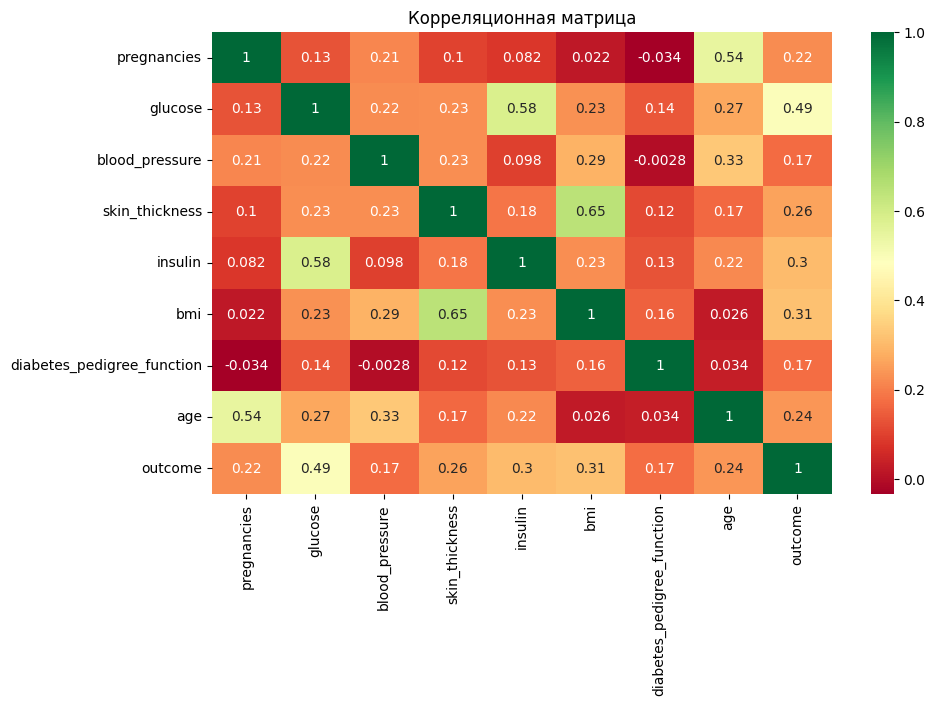

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes.corr(), annot=True, cmap='RdYlGn')
plt.title('Корреляционная матрица')
plt.show()

Опираясь на таблицу корреляционных связей сделаем выводы о влиянии показателей на диагноз.
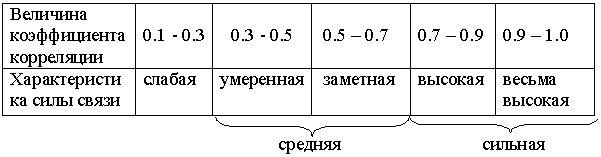




Ближе к заметной корреляция между диагнозом и уровнем глюкозы в крови. Инсулин и индекс массы тела связа умеренно. Слабая корреляция наблюдается у количества беременностей, наследственности, возраста и толщины кожной складки. Но при этом мы видим заметную связть между инсулином и уровнем сахара, а также между толщиной складки и индексом массы тела. Данные показатели логически и методически взаимосвязаны.


In [24]:
px.scatter(diabetes, x= 'insulin', y= 'bmi', color='outcome', color_continuous_scale='RdBu',
           title = 'Зависимость инсулина и индекса массы тела на диагноз',
           labels = dict(insulin = 'Инсулин', bmi = 'Индекс массы тела'),
           width = 1000, height = 500)

In [25]:
px.scatter(diabetes, x= 'glucose', y= 'bmi', color='outcome', color_continuous_scale='RdBu',
           title = 'Зависимость глюкозы и индекса массы тела на диагноз',
           labels = dict(insulin = 'Глюкоза', bmi = 'Индекс массы тела'),
           width = 1000, height = 500)

Дополнительно изучим взаимосвязь глюкозы и возраста, а также глюкозы и индекса массы тела

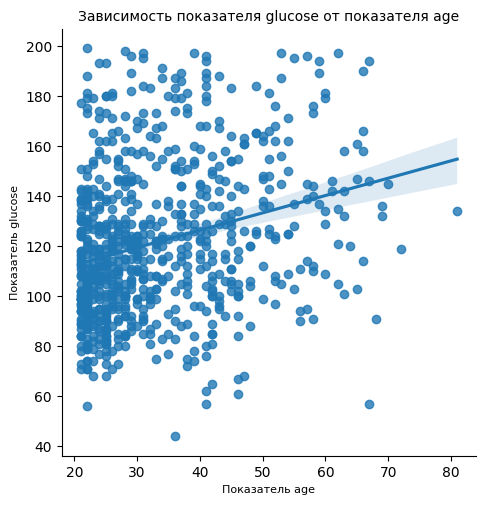

In [26]:
grafic(diabetes, 'age', 'glucose')

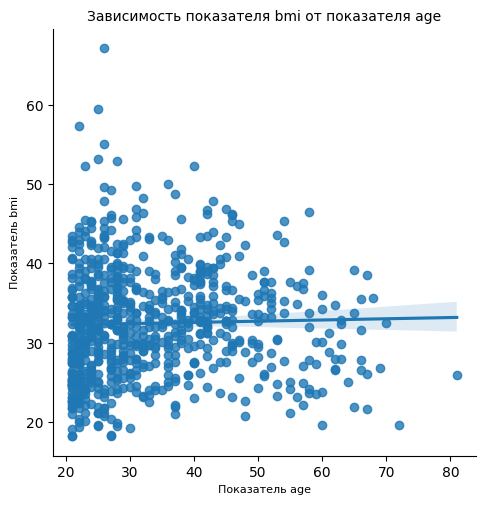

In [27]:
grafic(diabetes, 'age', 'bmi')

### Выводы по исследовательскому анализу файла diabetes

1. При высоком индексе тела повышается вероятность развития диабета

2. Повышенные инсулин и глюкоза в крови являются признаками развития диабета.

3. Наследственность в меньшей мере играет роль в развитии диабет, чем образ жизни.

4. При сочетании высокого содержания глюкозы и индекса массы тела повышается вероятность развития диабета

5. Превышение норм содержания глюкозы и индекса массы тела наблюдается у опрошенных в возрасте 20-30 лет. Это объясняется тем, что в датасете большая часть опрошенных находится в данном диапазоне возраста. Сказать однозначно о зависимости затруднительно.

## Анализ датасетов train и test

Согласно информации представленной на Kaggle:
Цель исследования — выявить наиболее значимые факторы риска сердечно-сосудистых заболеваний, а также спрогнозировать общий риск с помощью логистической регрессии.

• Sex: пол ("M" or "F")

• Age: возраст

• is_smoking: курение ("YES" or "NO")

• Cigs Per Day: количество сигарет в день

• BP Meds: принимает ли препараты от давления

• Prevalent Stroke: перенесенный инсульт

• Prevalent Hyp: гипортония

• Diabetes: диабет

• Tot Chol: холестерин

• Sys BP: систолическое давление

• Dia BP: диастолическое давление

• BMI: масса тела

• Heart Rate: чатота сердечных сокращений

• Glucose: уровень глюкозы

• TenYearCHD: риск развития ишемической болезни

In [28]:
! gdown --id 1II-JmvEbynDozgRKGjmRng2y5kmZtu0G

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1II-JmvEbynDozgRKGjmRng2y5kmZtu0G
To: /content/test.csv
100% 55.5k/55.5k [00:00<00:00, 63.5MB/s]


In [29]:
! gdown --id 12cckZ-aWoLofmD09sXX4w89AMNGOnycF

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12cckZ-aWoLofmD09sXX4w89AMNGOnycF
To: /content/train.csv
100% 228k/228k [00:00<00:00, 96.7MB/s]


In [30]:
#загрузим тестовый датасет
try:
  test=pd.read_csv('/content/test.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  test=pd.read_csv('/test.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [31]:
#загрузим обучающий датасет
try:
  train=pd.read_csv('/content/train.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  train=pd.read_csv('/train.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [32]:
test.head(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  3390   43        2.0   M        YES        35.0     0.0                0   
1  3391   56        3.0   F         NO         0.0     0.0                0   
2  3392   58        1.0   F        YES        20.0     0.0                0   
3  3393   47        3.0   F         NO         0.0     0.0                0   
4  3394   44        1.0   M         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    207.0  117.0   65.0  24.42       60.0    100.0  
1             0         0    192.0  122.0   82.5  28.61       68.0     58.0  
2             1         0    260.0  180.0  100.0  25.56      100.0      NaN  
3             0         0    231.0  102.5   66.0  23.40       70.0     78.0  
4             0         0    160.0  118.5   87.0  25.81       54.0      NaN

In [33]:
train.head(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

Объединим два датасета в один. Предварительно из обучающего датасета удалим столбец TenYearCHD, т к это целевой признак для построения модели по прогнозированию риска ишемической болезни сердца в ближайшие 10 лет.

In [34]:
train=train.drop('TenYearCHD', axis=1)

In [35]:
train.shape

(3390, 16)

In [36]:
test.shape

(848, 16)

In [37]:
cardio_df=pd.concat([train, test])

In [38]:
cardio_df.shape

(4238, 16)

###Предобработка датасета cardio_df

In [39]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
dtypes: float64(9), int64(5), object(2)
memory usage: 562.9+ KB


In [40]:
#приведем столбцы к единому виду
cardio_df = cardio_df.rename(columns = {'cigsPerDay':'cigs_per_day',
                                      'prevalentStroke':'prevalent_stroke',
                                      'prevalentHyp':'prevalent_hyp',
                                      'BPMeds':'bp_meds',
                                      'totChol':'tot_chol',
                                      'sysBP':'sys_bp',
                                      'diaBP':'dia_bp',
                                      'heartRate':'heart_rate'})
cardio_df.columns = map(str.lower, cardio_df.columns)
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol',
       'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose'],
      dtype='object')

In [41]:
#проверим на наличие пропусков
cardio_df.isna().sum()

id                    0
age                   0
education           105
sex                   0
is_smoking            0
cigs_per_day         29
bp_meds              53
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
tot_chol             50
sys_bp                0
dia_bp                0
bmi                  19
heart_rate            1
glucose             388
dtype: int64

In [42]:
#проверим, есть ли пропуски в количестве сигарет, еслти человек не курит
smoke=cardio_df.query('is_smoking == "NO"')
smoke['cigs_per_day'].isna().sum()

0

В таком случае оставим пропуски и не будем заполнять. Вероятнее всего при сборе данных не все столбцы были обязательными, поэтому в данных много пропусков.

In [43]:
#проверим наличие явных пропусков
cardio_df.duplicated().sum()

0

In [44]:
anomaly(cardio_df)

Размер файла:(4238, 16)
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: id
[   0    1    2 ... 4235 4236 4237]
Количество уникальных значений: 4238
Количество всех значений: 4238
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: age
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
Количество уникальных значений: 39
Количество всех значений: 4238
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: education
[ 2.  4.  1.  3. nan]
Количество уникальных значений: 4
Количество всех значений: 4133
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: sex
['F' 'M']
Количество уникальных значений: 2
Ко

**Выводы:** явных аномалий не обнаружено, пропуски не заполняем во избежание искажения данных.

###Исследовательский анализ файла cardio_df

In [45]:
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol',
       'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose'],
      dtype='object')

In [46]:
#разделим столбцы по категориям
cardio_num=['age', 'cigs_per_day',
            'tot_chol', 'sys_bp', 'dia_bp',
            'bmi', 'heart_rate', 'glucose']
cardio_pie=[ 'sex', 'is_smoking','bp_meds',
            'prevalent_stroke', 'prevalent_hyp', 'diabetes']

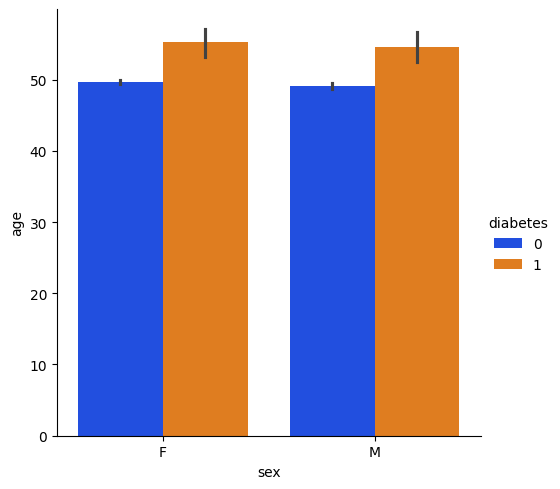

In [47]:
sns.catplot(x='sex',  y='age', data = cardio_df,
            palette='bright', kind='bar',hue='diabetes')
plt.show()

Анализ показателя age


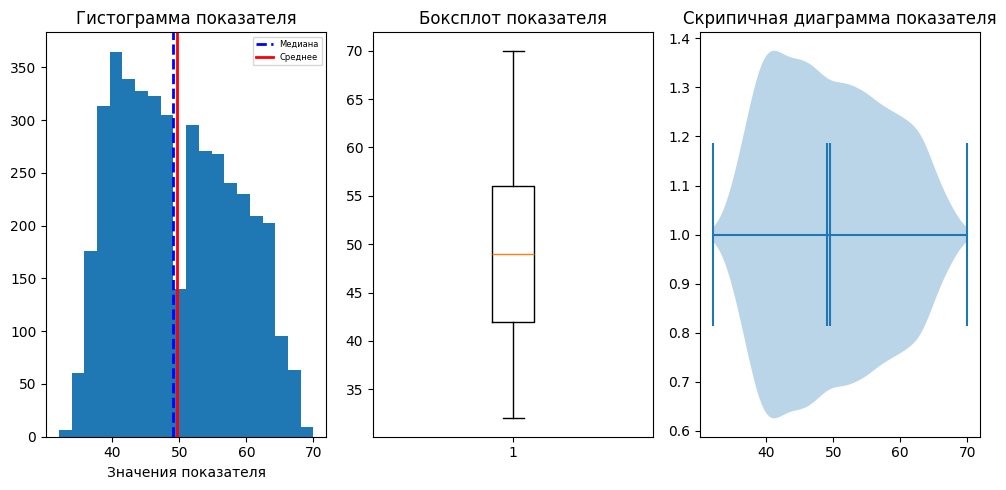

Показатели описательной статистики
count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя cigs_per_day


/usr/local/lib/python3.11/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning:

invalid value encountered in det



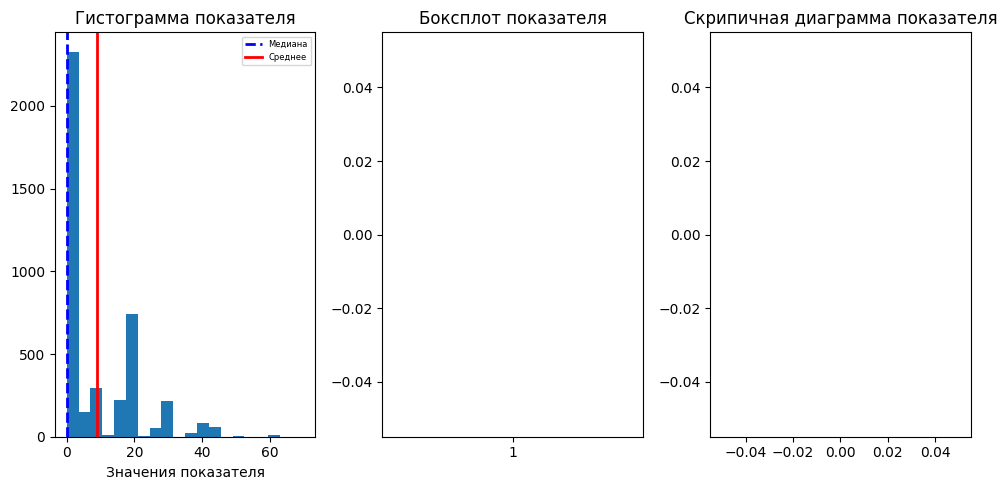

Показатели описательной статистики
count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigs_per_day, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя tot_chol


/usr/local/lib/python3.11/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning:

invalid value encountered in det



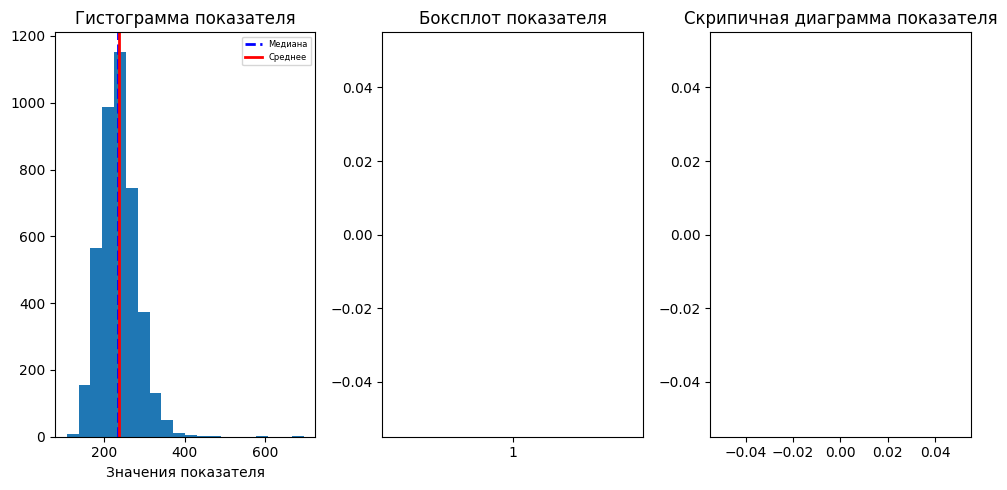

Показатели описательной статистики
count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: tot_chol, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя sys_bp


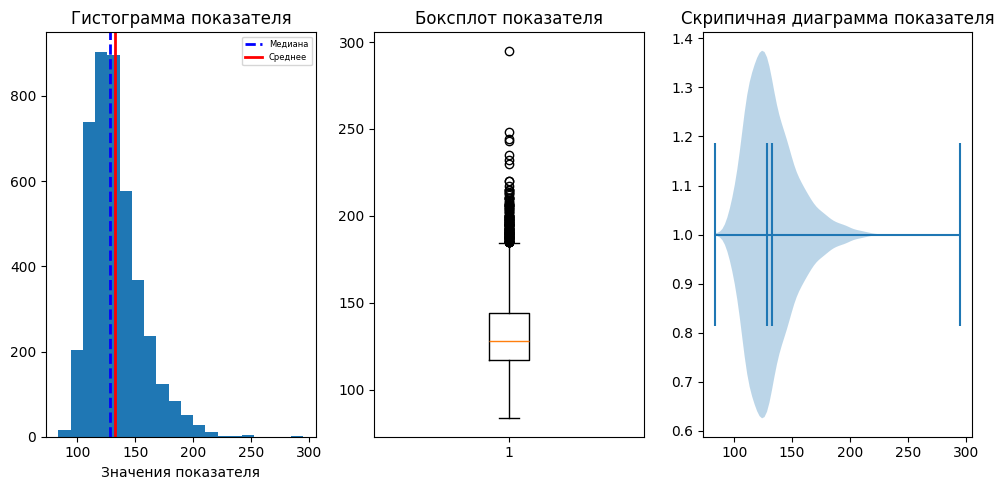

Показатели описательной статистики
count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sys_bp, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя dia_bp


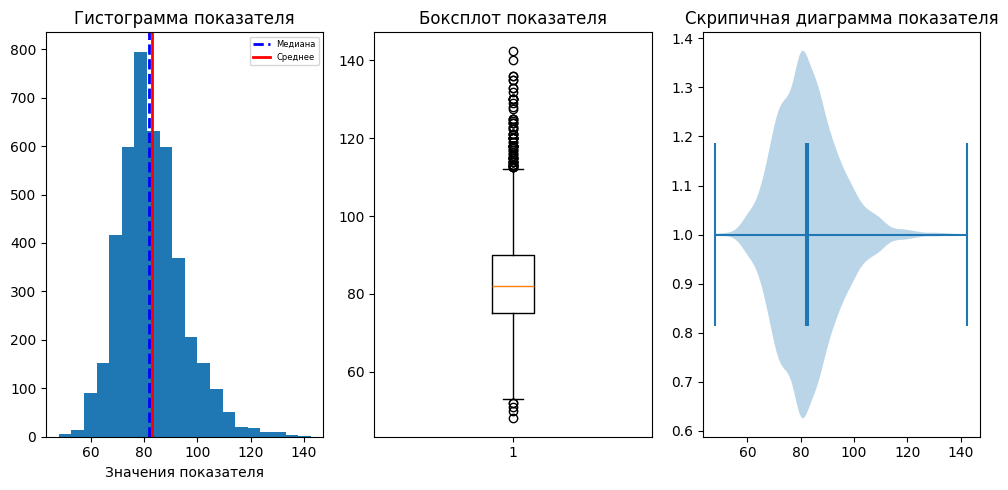

Показатели описательной статистики
count    4238.000000
mean       82.893464
std        11.910850
min        48.000000
25%        75.000000
50%        82.000000
75%        89.875000
max       142.500000
Name: dia_bp, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя bmi


/usr/local/lib/python3.11/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning:

invalid value encountered in det



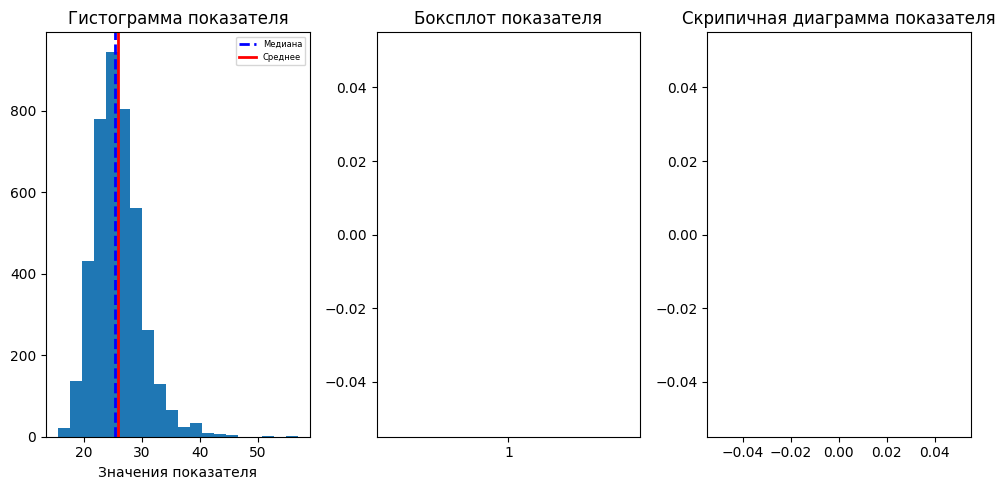

Показатели описательной статистики
count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: bmi, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя heart_rate


/usr/local/lib/python3.11/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning:

invalid value encountered in det



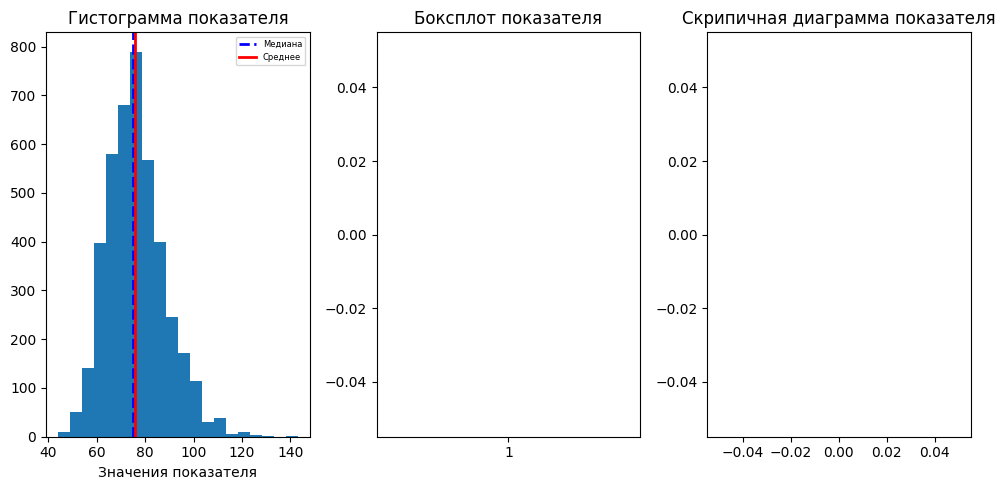

Показатели описательной статистики
count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heart_rate, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя glucose


/usr/local/lib/python3.11/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning:

invalid value encountered in det



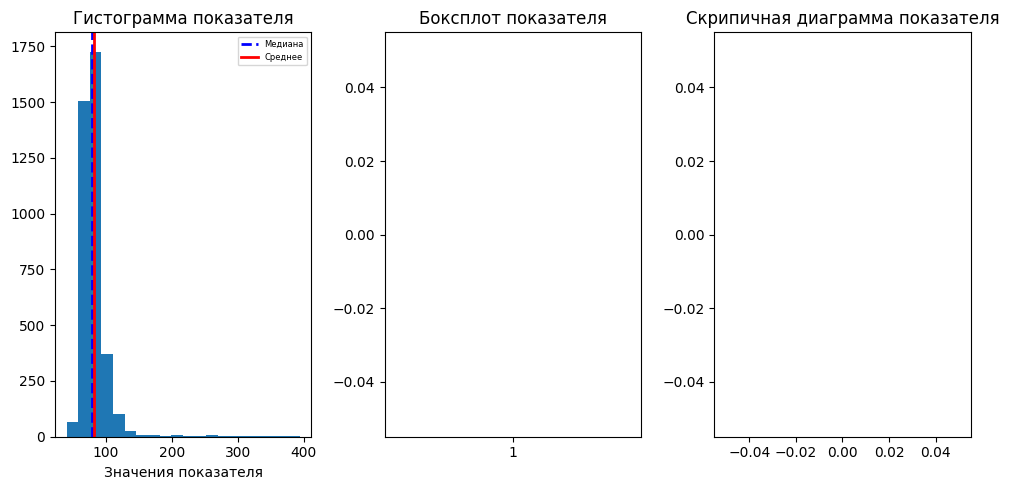

Показатели описательной статистики
count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64
----------------------------------------------------------------------------------------------------


In [48]:
for num in cardio_num:
  print(f'Анализ показателя {num}')
  analisys_num(cardio_df[num])
  print('-'*100)

Анализ показателя cigs_per_day


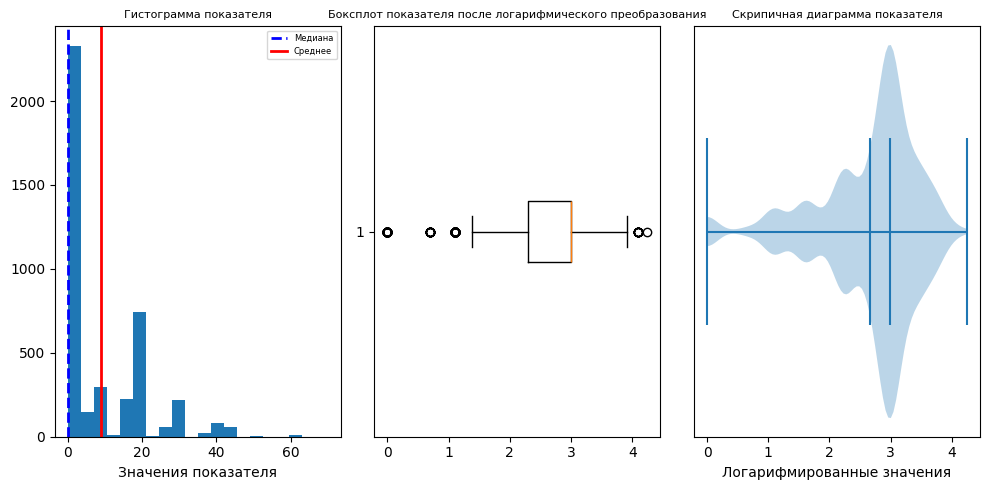

Показатели описательной статистики
count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigs_per_day, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя tot_chol


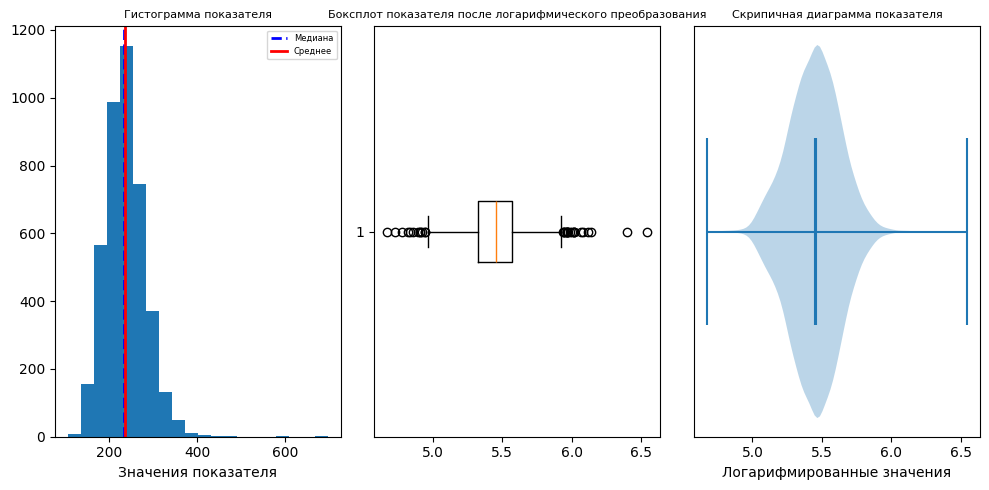

Показатели описательной статистики
count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: tot_chol, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя bmi


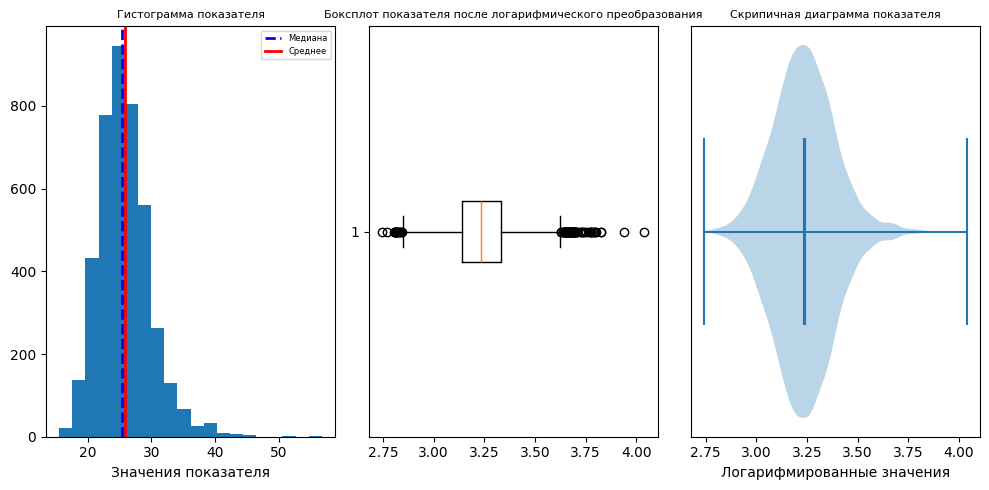

Показатели описательной статистики
count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: bmi, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя heart_rate


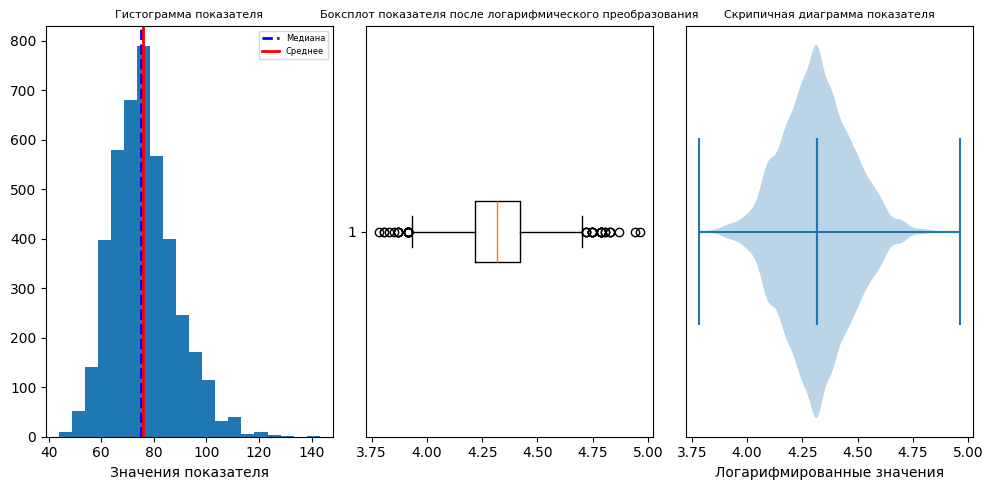

Показатели описательной статистики
count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heart_rate, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя glucose


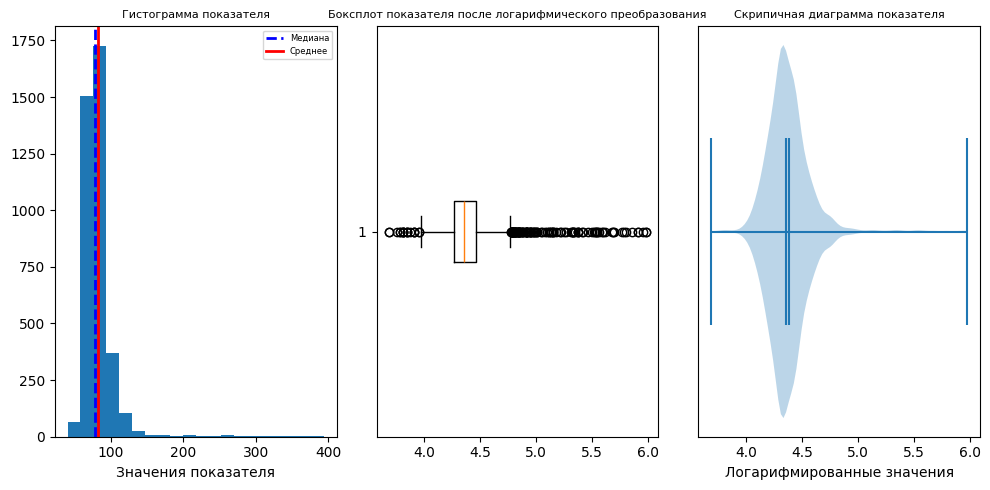

Показатели описательной статистики
count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64
----------------------------------------------------------------------------------------------------


In [49]:
#есть часть данных, у которых большой разброс и поэтому боксплот не построен
#используем модифицированную функцию для исследования количесвтенных показателей
cardio_num_2=['cigs_per_day', 'tot_chol',
              'bmi', 'heart_rate', 'glucose']
for num in cardio_num_2:
  print(f'Анализ показателя {num}')
  analisys_num_2(cardio_df[num])
  print('-'*100)

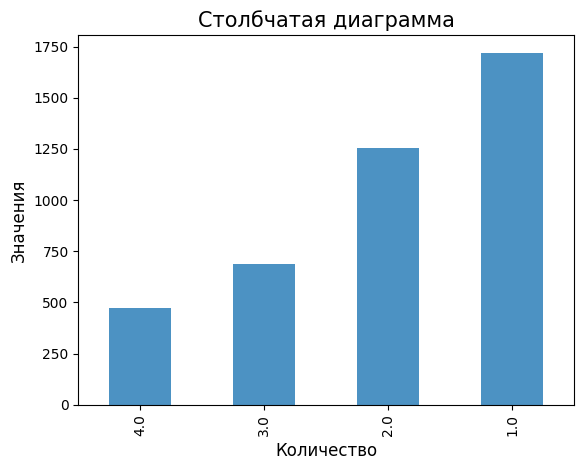

In [50]:
analisys_cat_plot(cardio_df['education'])

Анализ показателя sex


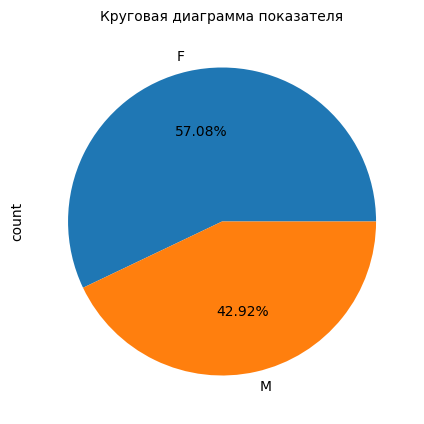

----------------------------------------------------------------------------------------------------
Анализ показателя is_smoking


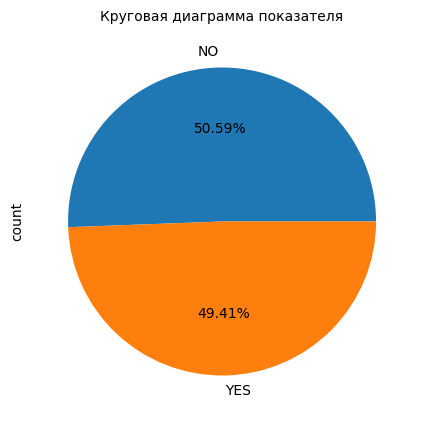

----------------------------------------------------------------------------------------------------
Анализ показателя bp_meds


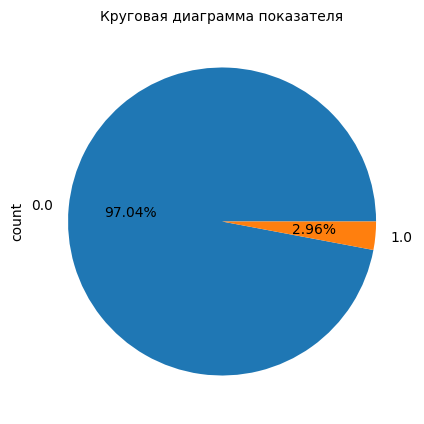

----------------------------------------------------------------------------------------------------
Анализ показателя prevalent_stroke


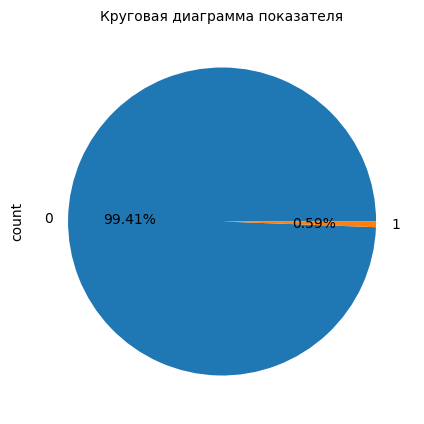

----------------------------------------------------------------------------------------------------
Анализ показателя prevalent_hyp


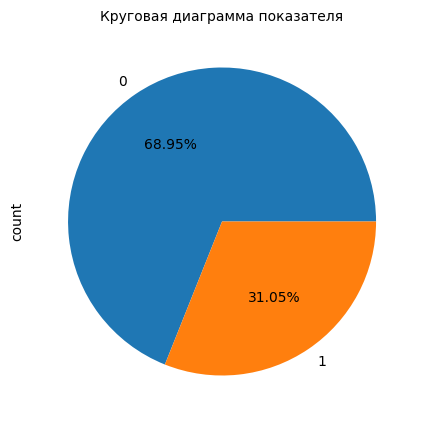

----------------------------------------------------------------------------------------------------
Анализ показателя diabetes


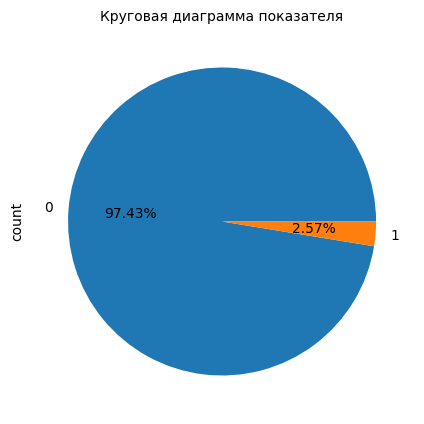

----------------------------------------------------------------------------------------------------


In [51]:
for pie in cardio_pie:
  print(f'Анализ показателя {pie}')
  analisys_cat_pie(cardio_df[pie])
  print('-'*100)

Видно, что в данных преобладает количесвто людей без диабета. В данных представлена оба пола в равном количестве. Но учитывая цель нашего исследования возникает следующая проблема: всего в датасете людей с диагнозом диабет менее 3 %. Из чего следует, что рассмотрение этих данных могут не дать нам корректный ответ из-за малого количества статистики.

В отрыве от цели исследования видно, что сильных выбросов в данных нет. В основном все данные стремятся к нормальному распределению. При половине курящих в количестве сигарет в день преобладает 1 сигарета в день. В файле мало людей с гипертонией и перенесших инсульт из чего логично вытекает, что терапия назначена всего 2,96 % людей из исследования. Как видно из данных, в исследовании в среднем и по медианному значению учавствовали люди с весом, который находится в норме. То же самое можно сказать и о результатах анализов крови.

Рассмотрим матрицу корреляции. Учитывая, что в данных есть категориальные значения, воспользуемся кэффициентом phik.

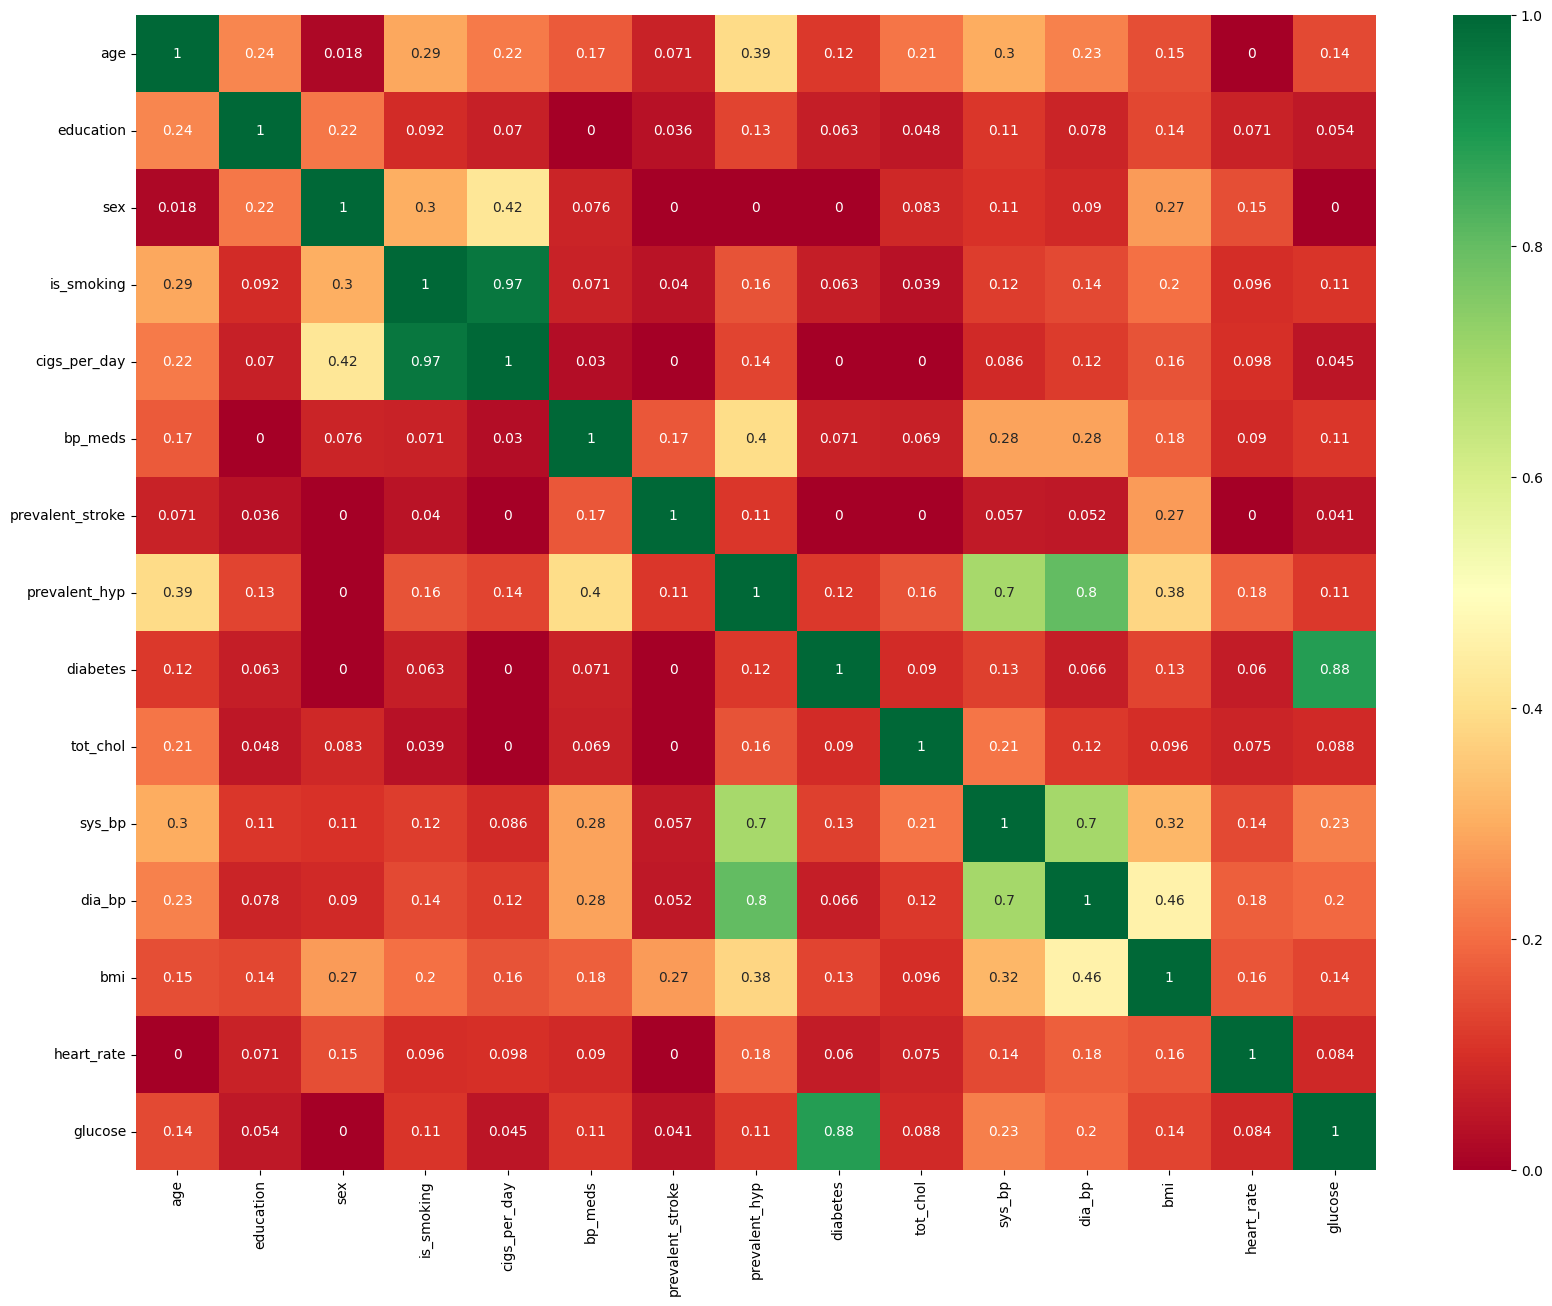

In [52]:
corr_matrix = cardio_df.drop('id', axis=1).phik_matrix(interval_cols = cardio_num )
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.show()

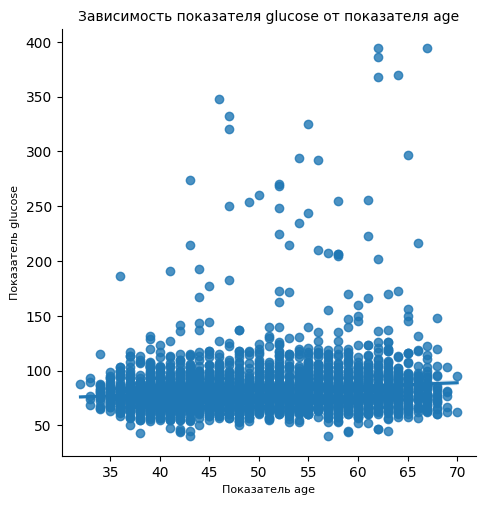

In [53]:
grafic(cardio_df, 'age', 'glucose')

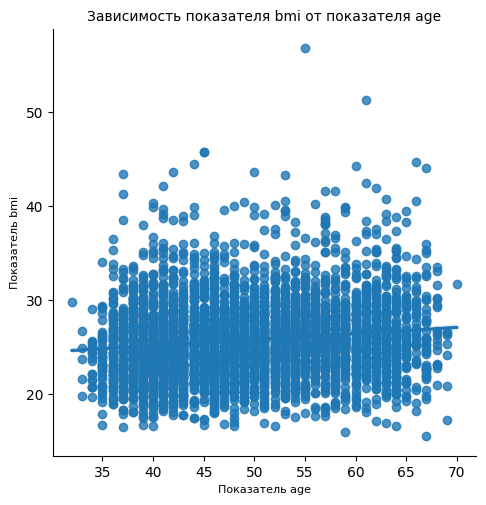

In [54]:
grafic(cardio_df, 'age', 'bmi')

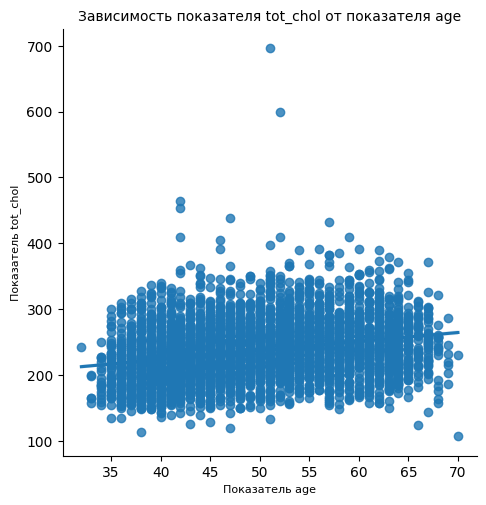

In [55]:
grafic(cardio_df, 'age', 'tot_chol')

### Выводы по исследовательскому анализу датафрейма cardio_df

1. Пол, количество сигарет в день и перенесенный инсульт не влияют на развитие диабета (корелляция 0)

2. Очень слабо коррелируют с постановкой диагноза такие показатели, как: образование, курение, прием гипотензивной терапии, общий холестерин и ЧСС.

3. Слабую корреляwию имеют: возраст, наличие гипертензии, систолтческое давление и индекс массы тела.

4. Ранее при исследовании датайрема diabetes так же отмечалась слабая корреляция между индексом массы тела и постановкой диагноза

5. Постановка диагноза сильно связана с уровнем глюкозы в крови (коэффициент 0.88)

6. Зависимость индекса массы тела, глюкозы и холестерина от возраста не обнаружено.

## Анализ датасета indications

С сайат Kaggle:

Этот набор данных содержит 3 файла:

1. diabetes _ 012 _ health indication _ BRFSS2015.csv — это чистый набор данных, состоящий из 253 680 ответов на опрос BRFSS2015, проведённый Центром по контролю и профилактике заболеваний США. Целевая переменная Diabetes_012 имеет 3 класса. 0 означает отсутствие диабета или наличие диабета только во время беременности, 1 — преддиабет, 2 — диабет. В этом наборе данных наблюдается дисбаланс классов. В этом наборе данных 21 переменная-признак

2. diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv - это чистый набор данных из 70 692 ответов на опрос CDC BRFSS2015. В нем доля респондентов без диабета составляет 50 на 50, а также либо с преддиабетом, либо с диабетом. Целевая переменная Diabetes_binary имеет 2 класса. 0 означает отсутствие диабета, а 1 - преддиабет или сахарный диабет. Этот набор данных содержит 21 функциональную переменную и является сбалансированным.

3. diabetes _ binary _ health _ indicators _ BRFSS2015.csv - это чистый набор данных из 253 680 ответов на опрос CDC BRFSS2015. Целевая переменная Diabetes_binary имеет 2 класса. 0 означает отсутствие диабета, а 1 - преддиабет или сахарный диабет. Этот набор данных содержит 21 характеристическую переменную и не сбалансирован.

In [56]:
! gdown --id 1W97xklTjhU8k2HmBuw64q4pFrbb5gdLk

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W97xklTjhU8k2HmBuw64q4pFrbb5gdLk
To: /content/diabetes_012_health_indicators_BRFSS2015.csv
100% 22.7M/22.7M [00:00<00:00, 61.7MB/s]


In [57]:
! gdown --id 1KqIkAi2R0m9rvwcHRZvD45dnJsg5f6cH

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KqIkAi2R0m9rvwcHRZvD45dnJsg5f6cH
To: /content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
100% 6.35M/6.35M [00:00<00:00, 48.2MB/s]


In [58]:
! gdown --id 18JqlkwU2uMYXCcuHiT3dmsF59HfldVbD

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18JqlkwU2uMYXCcuHiT3dmsF59HfldVbD
To: /content/diabetes_binary_health_indicators_BRFSS2015.csv
100% 22.7M/22.7M [00:00<00:00, 128MB/s] 


In [59]:
#загрузим первый датасет датасет
try:
  indication_1=pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  indication_1=pd.read_csv('/diabetes_012_health_indicators_BRFSS2015.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [60]:
#загрузим второй датасет датасет
try:
  indication_2=pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  indication_2=pd.read_csv('/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [61]:
#загрузим третий датасет датасет
try:
  indication_3=pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  indication_3=pd.read_csv('/diabetes_binary_health_indicators_BRFSS2015.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [62]:
indication_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [63]:
indication_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [64]:
indication_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Переименуем столбец в первом датасете и объеденим все три датасета в один.

In [65]:
indication_1=indication_1.rename(columns={'Diabetes_012':'Diabetes_binary'})

In [66]:
indication_df=pd.concat([indication_1, indication_2, indication_3])

###Предобработка датасета indication

In [67]:
indication_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  MentH

In [68]:
#приведем столбцы к единому виду
indication_df = indication_df.rename(columns = {'Diabetes_binary':'diabetes',
                                      'HighBP':'high_bp',
                                      'HighChol':'high_chol',
                                      'CholCheck':'chol_check',
                                      'HeartDiseaseorAttack':'heart_diseaseor_attack',
                                      'PhysActivity':'phys_activity',
                                      'HvyAlcoholConsump':'hvy_alcohol_consump',
                                      'AnyHealthcare':'any_healthcare',
                                      'NoDocbcCost':'no_docbc_cost',
                                      'GenHlth':'gen_hlth',
                                      'MentHlth':'ment_hlth',
                                      'PhysHlth':'phys_hlth',
                                      'DiffWalk':'diff_walk'})
indication_df.columns = map(str.lower, indication_df.columns)
indication_df.columns

Index(['diabetes', 'high_bp', 'high_chol', 'chol_check', 'bmi', 'smoker',
       'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits',
       'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',
       'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age',
       'education', 'income'],
      dtype='object')

In [69]:
#проверим на датасет на явные дубликаты, т к возможно изначально все бралось из одного датасета
indication_df.duplicated().sum()

308921

In [70]:
#удалим явные дубликаты
indication_df.drop_duplicates(inplace=True, keep='first')

In [71]:
indication_df.duplicated().sum()

0

In [72]:
#проверим на наличие пропусков
indication_df.isna().sum()

diabetes                  0
high_bp                   0
high_chol                 0
chol_check                0
bmi                       0
smoker                    0
stroke                    0
heart_diseaseor_attack    0
phys_activity             0
fruits                    0
veggies                   0
hvy_alcohol_consump       0
any_healthcare            0
no_docbc_cost             0
gen_hlth                  0
ment_hlth                 0
phys_hlth                 0
diff_walk                 0
sex                       0
age                       0
education                 0
income                    0
dtype: int64

**Выводы:**

Были объеденины три датасета, убраны явные дубликаты и изучено наличие пропусков.

### Исследовательский аналих датаеса indication_df

In [73]:
indication_df.head(5)

diabetes  high_bp  high_chol  chol_check   bmi  smoker  stroke  \
0       0.0      1.0        1.0         1.0  40.0     1.0     0.0   
1       0.0      0.0        0.0         0.0  25.0     1.0     0.0   
2       0.0      1.0        1.0         1.0  28.0     0.0     0.0   
3       0.0      1.0        0.0         1.0  27.0     0.0     0.0   
4       0.0      1.0        1.0         1.0  24.0     0.0     0.0   

   heart_diseaseor_attack  phys_activity  fruits  veggies  \
0                     0.0            0.0     0.0      1.0   
1                     0.0            1.0     0.0      0.0   
2                     0.0            0.0     1.0      0.0   
3                     0.0            1.0     1.0      1.0   
4                     0.0            1.0     1.0      1.0   

   hvy_alcohol_consump  any_healthcare  no_docbc_cost  gen_hlth  ment_hlth  \
0                  0.0             1.0            0.0       5.0       18.0   
1                  0.0             0.0            1.0       3.0        0.0   
2                  0.0             1.0            1.0       5.0       30.0   
3                  0.0             1.0            0.0       2.0        0.0   
4                  0.0             1.0            0.0       2.0        3.0   

   phys_hlth  diff_walk  sex   age  education  income  
0       15.0        1.0  0.0   9.0        4.0     3.0  
1        0.0        0.0  0.0   7.0        6.0     1.0  
2       30.0        1.0  0.0   9.0        4.0     8.0  
3        0.0        0.0  0.0  11.0        3.0     6.0  
4        0.0        0.0  0.0  11.0        5.0     4.0

In [74]:
indication_df.columns

Index(['diabetes', 'high_bp', 'high_chol', 'chol_check', 'bmi', 'smoker',
       'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits',
       'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',
       'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age',
       'education', 'income'],
      dtype='object')

In [75]:
indication_cat_pie=['diabetes', 'high_bp', 'high_chol', 'chol_check','smoker',
                    'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits',
                    'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',
                    'diff_walk', 'sex']
indication_cat=['gen_hlth', 'ment_hlth',
                'phys_hlth', 'education',
                'income', 'age']

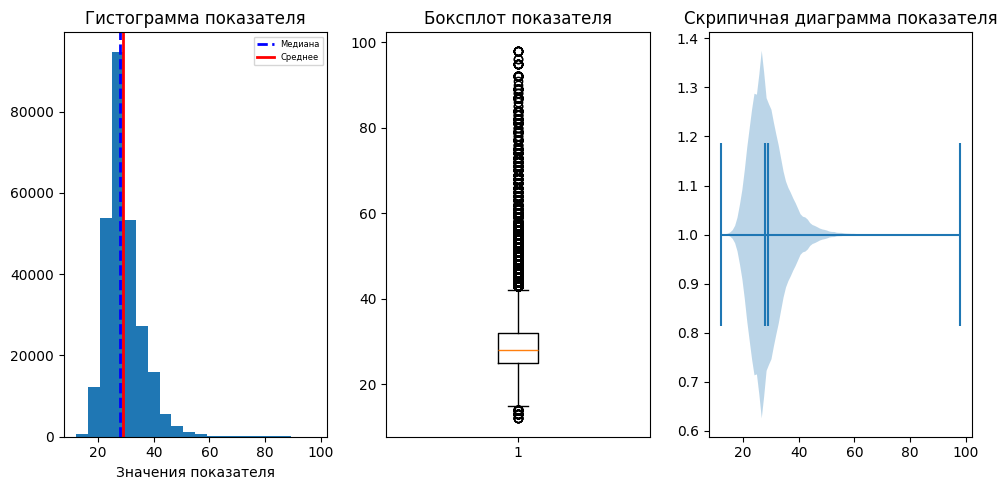

Показатели описательной статистики
count    269131.000000
mean         29.149920
std           6.963748
min          12.000000
25%          25.000000
50%          28.000000
75%          32.000000
max          98.000000
Name: bmi, dtype: float64


In [76]:
analisys_num(indication_df['bmi'])

Анализ показателя gen_hlth


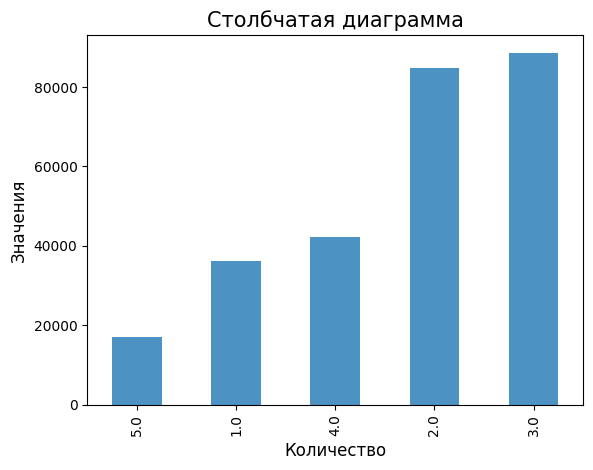

----------------------------------------------------------------------------------------------------
Анализ показателя ment_hlth


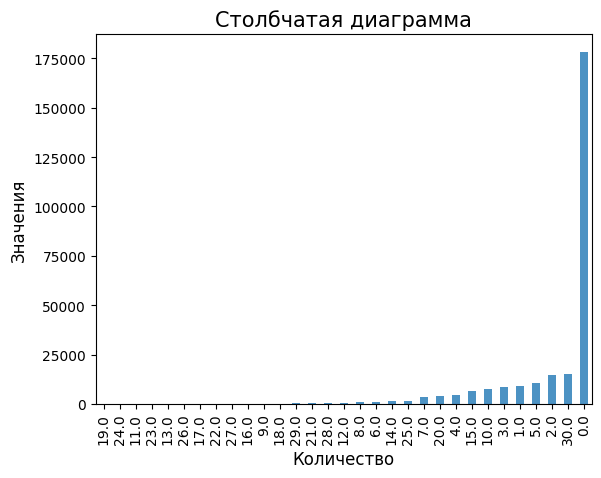

----------------------------------------------------------------------------------------------------
Анализ показателя phys_hlth


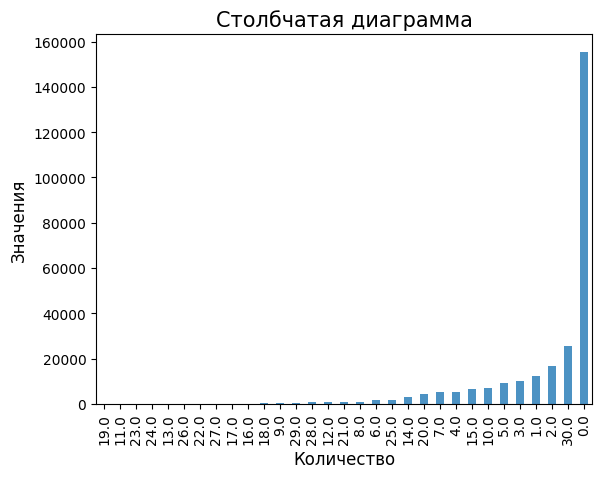

----------------------------------------------------------------------------------------------------
Анализ показателя education


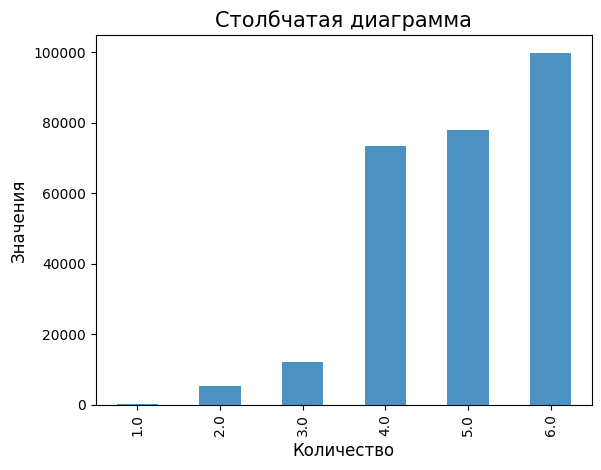

----------------------------------------------------------------------------------------------------
Анализ показателя income


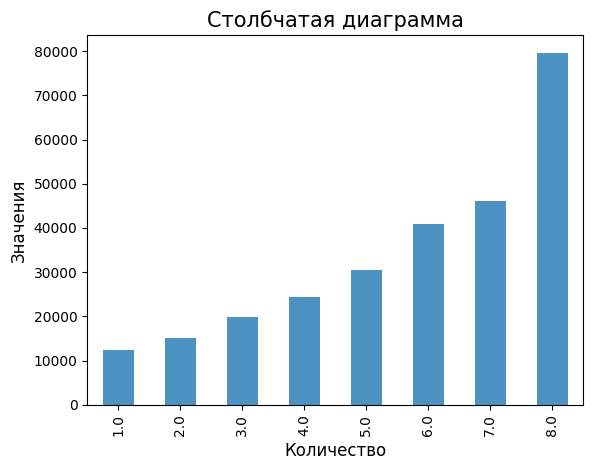

----------------------------------------------------------------------------------------------------
Анализ показателя age


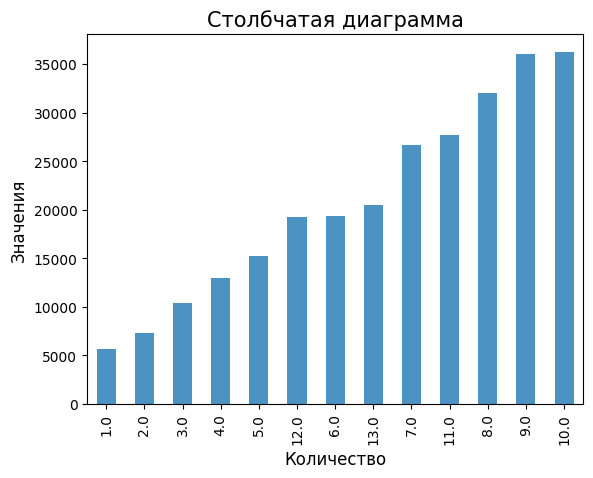

----------------------------------------------------------------------------------------------------


In [77]:
for cat in indication_cat:
  print(f'Анализ показателя {cat}')
  analisys_cat_plot(indication_df[cat])
  print('-'*100)

Анализ показателя diabetes


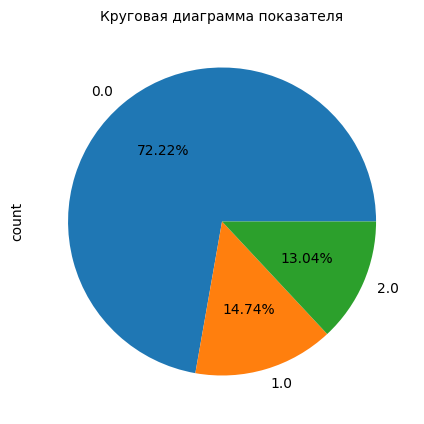

----------------------------------------------------------------------------------------------------
Анализ показателя high_bp


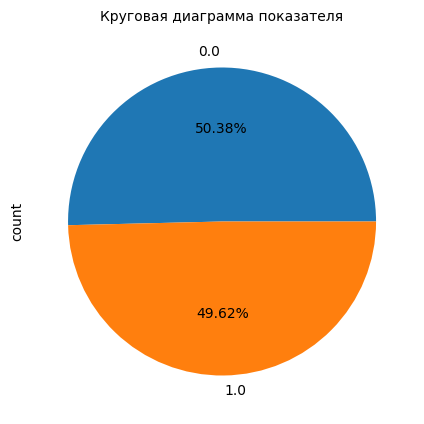

----------------------------------------------------------------------------------------------------
Анализ показателя high_chol


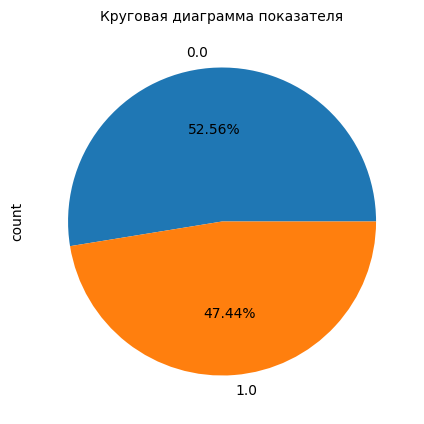

----------------------------------------------------------------------------------------------------
Анализ показателя chol_check


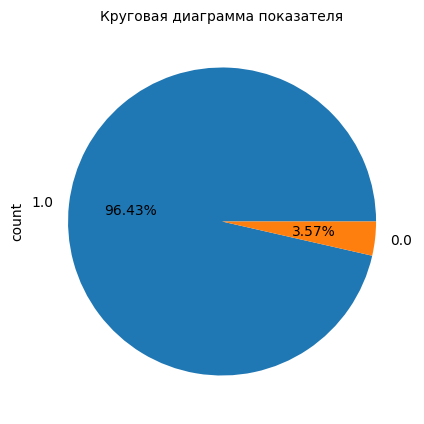

----------------------------------------------------------------------------------------------------
Анализ показателя smoker


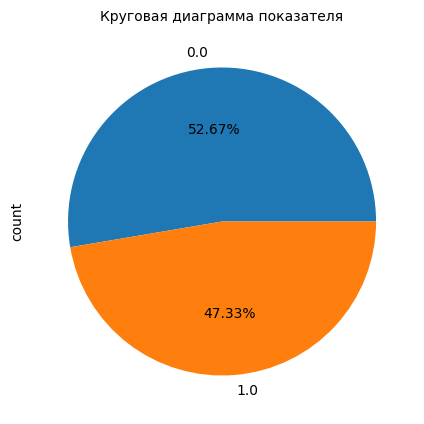

----------------------------------------------------------------------------------------------------
Анализ показателя stroke


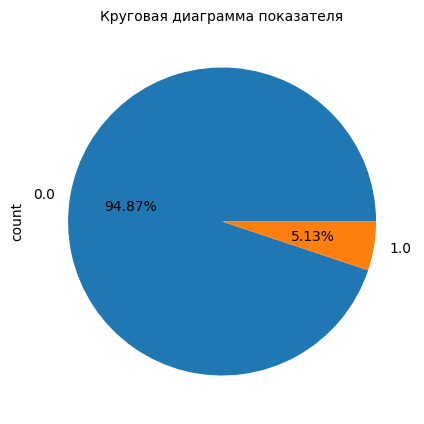

----------------------------------------------------------------------------------------------------
Анализ показателя heart_diseaseor_attack


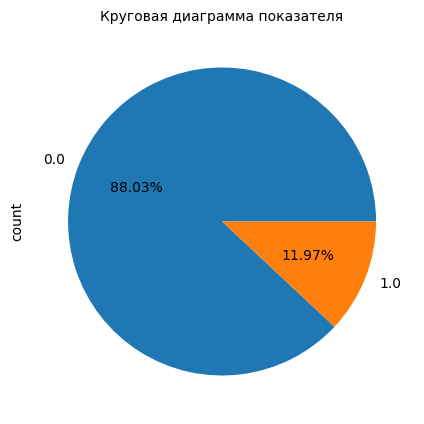

----------------------------------------------------------------------------------------------------
Анализ показателя phys_activity


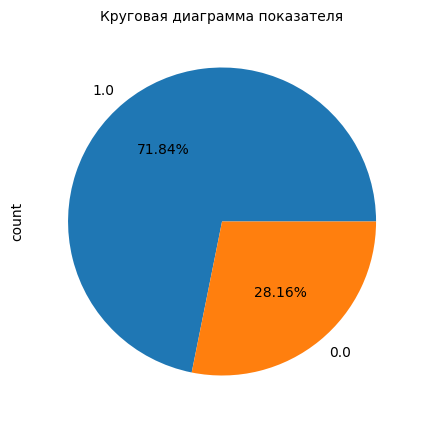

----------------------------------------------------------------------------------------------------
Анализ показателя fruits


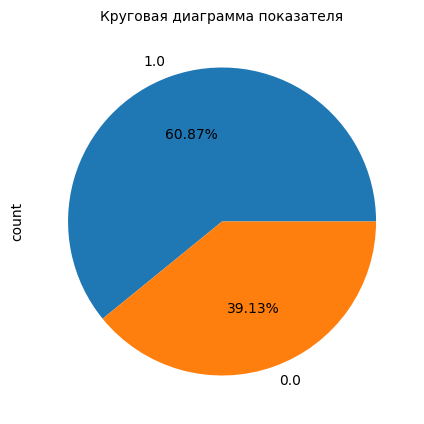

----------------------------------------------------------------------------------------------------
Анализ показателя veggies


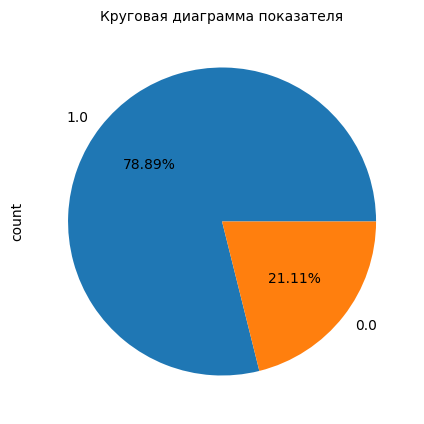

----------------------------------------------------------------------------------------------------
Анализ показателя hvy_alcohol_consump


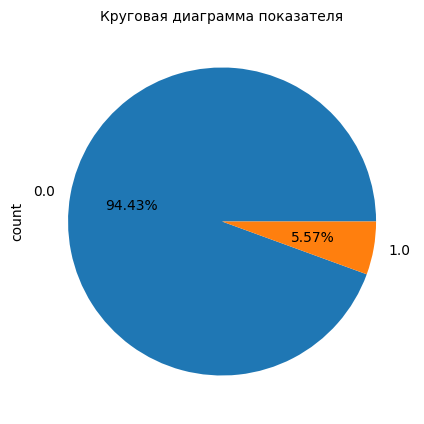

----------------------------------------------------------------------------------------------------
Анализ показателя any_healthcare


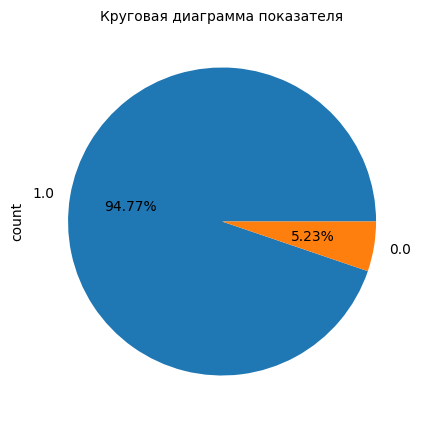

----------------------------------------------------------------------------------------------------
Анализ показателя no_docbc_cost


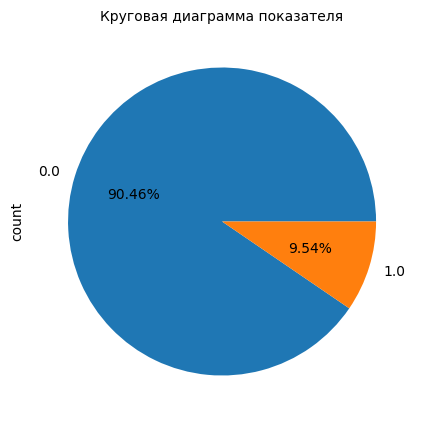

----------------------------------------------------------------------------------------------------
Анализ показателя diff_walk


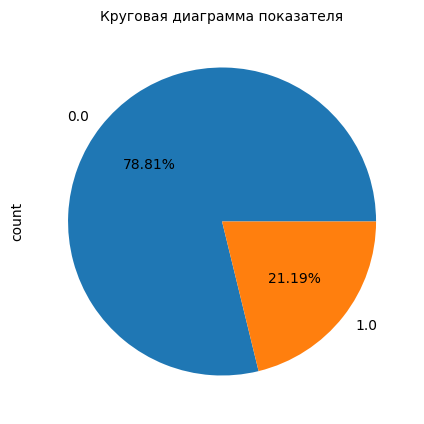

----------------------------------------------------------------------------------------------------
Анализ показателя sex


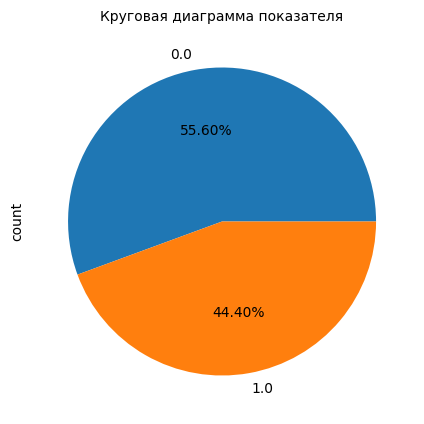

----------------------------------------------------------------------------------------------------


In [78]:
for pie in indication_cat_pie:
  print(f'Анализ показателя {pie}')
  analisys_cat_pie(indication_df[pie])
  print('-'*100)

**Промежуточные выводы:**

1. Датасет содержит равное количество мужчин и женщин в датасете.

2. Примерно 95 % опрошенных имеют медицинскую страховку и 90 % не обращались за медицинской помощью.

3. Больше всего в датасете представлено людей в возрасте от 70 лет до 75 лет.

4. Большая часть опрошенных ведет здоровый образ жизни и не имеет серьезных проблем с здоровьем (не переносили инфаркт, не поставлен диабет или предиабет)

Рассмотрим корреляционные связи

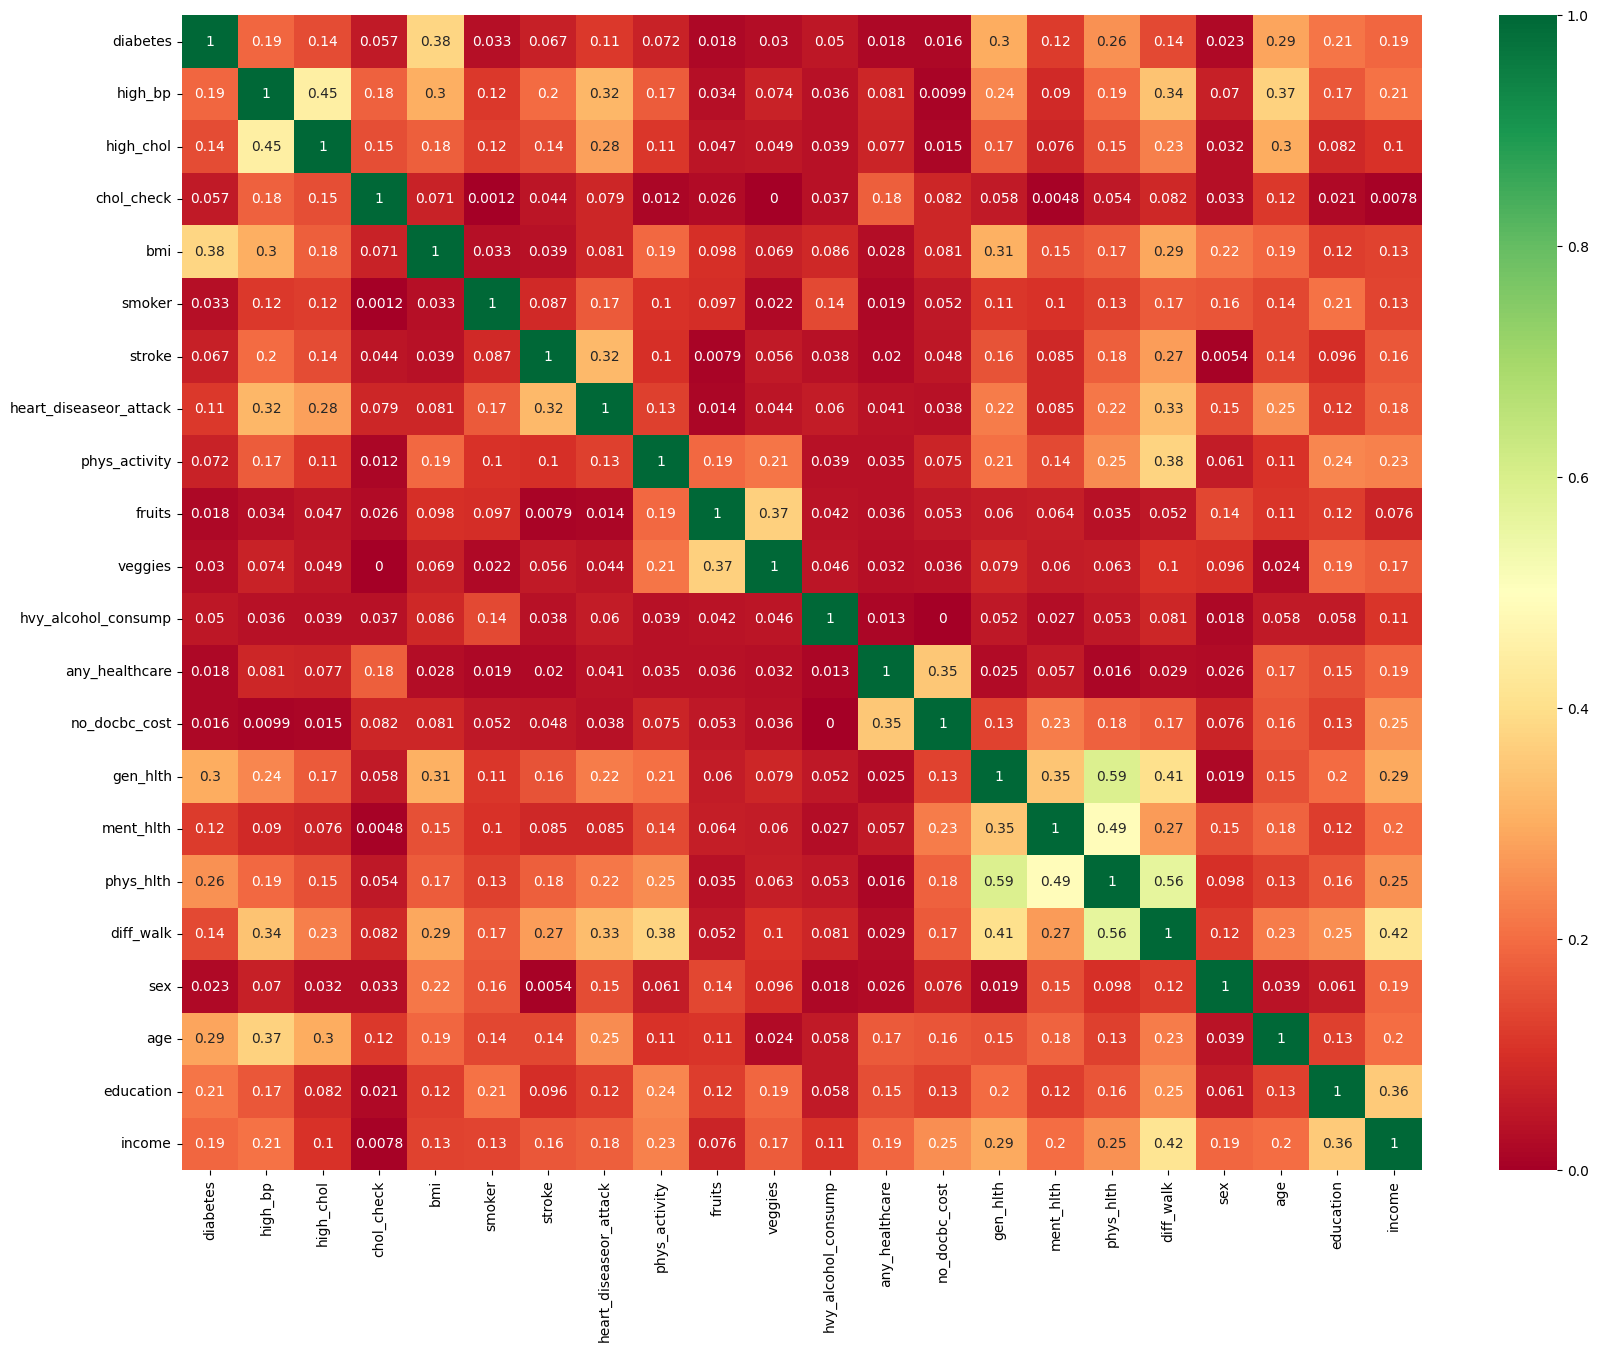

In [79]:
corr_matrix_ind = indication_df.phik_matrix(interval_cols = 'bmi')
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix_ind, annot=True, cmap='RdYlGn')
plt.show()

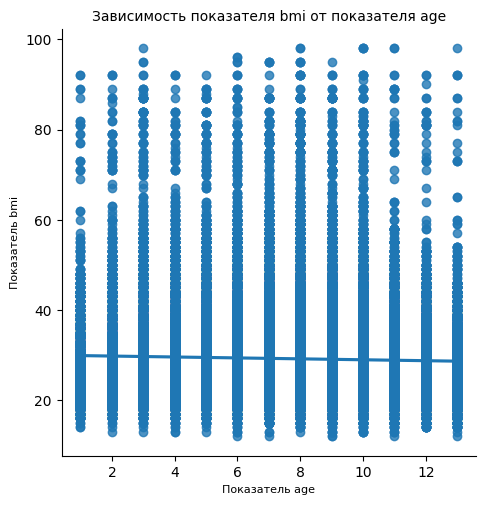

In [80]:
grafic(indication_df, 'age', 'bmi')

###Выводы по исследовательскому анализу indication_df

Наблюдается слабая связь между диагнозом и всеми признаками, собранными в файле. Но больший вклад в развитие диабета вносят следующие показатели: индекс массы тела (что было обнаружено и в других датафреймах), физическим здоровьем и генетической предрасположенностью.

##Объединение и анализ общего файла

###Подготовка датасетов к объединению

Рассмотрим все датафреймы и приведем их к единому формату.

In [81]:
diabetes.head(5)

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6    148.0            72.0            35.0      NaN  33.6   
1            1     85.0            66.0            29.0      NaN  26.6   
2            8    183.0            64.0             NaN      NaN  23.3   
3            1     89.0            66.0            23.0     94.0  28.1   
4            0    137.0            40.0            35.0    168.0  43.1   

   diabetes_pedigree_function  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

In [82]:
cardio_df.head(5)

id  age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0   0   64        2.0   F        YES           3.0      0.0                 0   
1   1   36        4.0   M         NO           0.0      0.0                 0   
2   2   46        1.0   F        YES          10.0      0.0                 0   
3   3   50        1.0   M        YES          20.0      0.0                 0   
4   4   64        1.0   F        YES          30.0      0.0                 0   

   prevalent_hyp  diabetes  tot_chol  sys_bp  dia_bp    bmi  heart_rate  \
0              0         0     221.0   148.0    85.0    NaN        90.0   
1              1         0     212.0   168.0    98.0  29.77        72.0   
2              0         0     250.0   116.0    71.0  20.35        88.0   
3              1         0     233.0   158.0    88.0  28.26        68.0   
4              0         0     241.0   136.5    85.0  26.42        70.0   

   glucose  
0     80.0  
1     75.0  
2     94.0  
3     94.0  
4     77.0

In [83]:
indication_df.head(5)

diabetes  high_bp  high_chol  chol_check   bmi  smoker  stroke  \
0       0.0      1.0        1.0         1.0  40.0     1.0     0.0   
1       0.0      0.0        0.0         0.0  25.0     1.0     0.0   
2       0.0      1.0        1.0         1.0  28.0     0.0     0.0   
3       0.0      1.0        0.0         1.0  27.0     0.0     0.0   
4       0.0      1.0        1.0         1.0  24.0     0.0     0.0   

   heart_diseaseor_attack  phys_activity  fruits  veggies  \
0                     0.0            0.0     0.0      1.0   
1                     0.0            1.0     0.0      0.0   
2                     0.0            0.0     1.0      0.0   
3                     0.0            1.0     1.0      1.0   
4                     0.0            1.0     1.0      1.0   

   hvy_alcohol_consump  any_healthcare  no_docbc_cost  gen_hlth  ment_hlth  \
0                  0.0             1.0            0.0       5.0       18.0   
1                  0.0             0.0            1.0       3.0        0.0   
2                  0.0             1.0            1.0       5.0       30.0   
3                  0.0             1.0            0.0       2.0        0.0   
4                  0.0             1.0            0.0       2.0        3.0   

   phys_hlth  diff_walk  sex   age  education  income  
0       15.0        1.0  0.0   9.0        4.0     3.0  
1        0.0        0.0  0.0   7.0        6.0     1.0  
2       30.0        1.0  0.0   9.0        4.0     8.0  
3        0.0        0.0  0.0  11.0        3.0     6.0  
4        0.0        0.0  0.0  11.0        5.0     4.0

Будем считать основным датафреймом последний и приведем первые два к общему виду. ДЛя начала создадим столбец high_bp в первых двух файлах.

In [84]:
diabetes['high_bp'] = 0

for index, row in diabetes.iterrows():
    if row['blood_pressure'] < 90:
        diabetes.at[index, 'high_bp'] = 0
    else:
        diabetes.at[index, 'high_bp'] = 1

diabetes.drop(columns='blood_pressure', inplace=True)

In [85]:
#учитывая, что в датафреймах далее есть и мужчины, добавим столбец с полом и заполним 0
diabetes['sex'] = 0

In [86]:
#напищем функцию, чтобы перезаполнить возраст с учетом категорий
#согласно комментариям в последнем датафрейме 1 категория 18-24, 13 более 80, шаг 5 лет
def age(data):
  #с помощью цикла перебираем значение в каждой строке в столбце 'age'
  for index, row in data.iterrows():
    #с помощью условной конструкции относим возраст к определенной категории и перезаписываем значение
    if 18 <= row['age'] <= 24:
      data.at[index, 'age'] = 1
    elif 25 <= row['age'] <= 29:
      data.at[index, 'age'] = 2
    elif 30 <= row['age'] <= 34:
      data.at[index, 'age'] = 3
    elif 35 <= row['age'] <= 39:
      data.at[index, 'age'] = 4
    elif 40 <= row['age'] <= 44:
      data.at[index, 'age'] = 5
    elif 45 <= row['age'] <= 49:
      data.at[index, 'age'] = 6
    elif 50 <= row['age'] <= 54:
      data.at[index, 'age'] = 7
    elif 55 <= row['age'] <= 59:
      data.at[index, 'age'] = 8
    elif 60 <= row['age'] <= 64:
      data.at[index, 'age'] = 9
    elif 65 <= row['age'] <= 69:
      data.at[index, 'age'] = 10
    elif 70 <= row['age'] <= 74:
      data.at[index, 'age'] = 11
    elif 75 <= row['age'] <= 79:
      data.at[index, 'age'] = 12
    else:
      data.at[index, 'age'] = 13


In [87]:
age(diabetes)

In [88]:
diabetes.head(5)

pregnancies  glucose  skin_thickness  insulin   bmi  \
0            6    148.0            35.0      NaN  33.6   
1            1     85.0            29.0      NaN  26.6   
2            8    183.0             NaN      NaN  23.3   
3            1     89.0            23.0     94.0  28.1   
4            0    137.0            35.0    168.0  43.1   

   diabetes_pedigree_function  age  outcome  high_bp  sex  
0                       0.627    7        1        0    0  
1                       0.351    3        0        0    0  
2                       0.672    3        1        0    0  
3                       0.167    1        0        0    0  
4                       2.288    3        1        0    0

In [89]:
#напишем функцию, чтобы разбить индекс массы тела на категории согласно нормам
def bmi(data):
  #создаем столбец заполненный нулевыми значениями
  data['bmi_category']=0

  #с помощью цикла перебираем значения в каждом столбце
  for index, row in data.iterrows():
    #условной конструкцией присваиваем категорию согласно общепринятым пределам индекса массы тела, всего 6
    if row['bmi'] < 18.5:
      data.at[index, 'bmi_category'] = 1
    elif 18.5 <= row['bmi'] < 25:
      data.at[index, 'bmi_category'] = 2
    elif 25 <= row['bmi'] < 30:
      data.at[index, 'bmi_category'] = 3
    elif 30 <= row['bmi'] < 35:
      data.at[index, 'bmi_category'] = 4
    elif 35 <= row['bmi'] < 40:
      data.at[index, 'bmi_category'] = 5
    else:
      data.at[index, 'bmi_category'] = 6
  #после присваивания категории удаляем столбец индекса массы тела, т к далее он будет не нужен
  data.drop(columns='bmi', inplace=True)

In [90]:
bmi(diabetes)

In [91]:
#если судить по данным, то во всех исследованиях использована глюкоза чере 2 часа после еды
#поэтому также категиризируем гюкозу
def glucose(data):
    #функция принимает весь датафрейм
    #с момощью лямбда функции прияваивается категория согласно условяим
    data['glucose_category'] = data.apply(lambda x: 1 if x['glucose'] < 140
                                          else 2 if 140 <= x['glucose'] < 200
                                          else 3, axis=1)
    #удаляем ненужный теперь столбец
    data.drop(columns='glucose', inplace=True)

In [92]:
glucose(diabetes)

In [93]:
#удалим столбец bmi и переименуем outcome на diabet и уточним в столбце глюкоза, что это спустя 2 часа
diabetes = diabetes.rename(columns={'outcome':'diabetes'})

In [94]:
diabetes.head(3)

pregnancies  skin_thickness  insulin  diabetes_pedigree_function  age  \
0            6            35.0      NaN                       0.627    7   
1            1            29.0      NaN                       0.351    3   
2            8             NaN      NaN                       0.672    3   

   diabetes  high_bp  sex  bmi_category  glucose_category  
0         1        0    0             4                 2  
1         0        0    0             3                 1  
2         1        0    0             2                 2

In [95]:
#аналогично подготовим второй датафрейм
cardio_df.head(4)

id  age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0   0   64        2.0   F        YES           3.0      0.0                 0   
1   1   36        4.0   M         NO           0.0      0.0                 0   
2   2   46        1.0   F        YES          10.0      0.0                 0   
3   3   50        1.0   M        YES          20.0      0.0                 0   

   prevalent_hyp  diabetes  tot_chol  sys_bp  dia_bp    bmi  heart_rate  \
0              0         0     221.0   148.0    85.0    NaN        90.0   
1              1         0     212.0   168.0    98.0  29.77        72.0   
2              0         0     250.0   116.0    71.0  20.35        88.0   
3              1         0     233.0   158.0    88.0  28.26        68.0   

   glucose  
0     80.0  
1     75.0  
2     94.0  
3     94.0

In [96]:
age(cardio_df)

In [97]:
bmi(cardio_df)


In [98]:
glucose(cardio_df)

In [99]:
cardio_df.head(3)

id  age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0   0    5        2.0   F        YES           3.0      0.0                 0   
1   1    8        4.0   M         NO           0.0      0.0                 0   
2   2    8        1.0   F        YES          10.0      0.0                 0   

   prevalent_hyp  diabetes  tot_chol  sys_bp  dia_bp  heart_rate  \
0              0         0     221.0   148.0    85.0        90.0   
1              1         0     212.0   168.0    98.0        72.0   
2              0         0     250.0   116.0    71.0        88.0   

   bmi_category  glucose_category  
0             2                 1  
1             3                 1  
2             3                 1

In [100]:
 for index, row in cardio_df.iterrows():
    if row['sex'] == 'M':
      cardio_df.at[index, 'sex'] = 1
    else:
       cardio_df.at[index, 'sex'] = 0

cardio_df['sex'] = cardio_df['sex'].astype(int)

In [101]:
 cardio_df['smoker'] = 0
 for index, row in cardio_df.iterrows():
    if row['is_smoking'] == 'YES':
      cardio_df.at[index, 'smoker'] = 1
    else:
       cardio_df.at[index, 'smoker'] = 0

cardio_df.drop(columns='is_smoking', inplace=True)

In [102]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 847
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4238 non-null   int64  
 1   age               4238 non-null   int64  
 2   education         4133 non-null   float64
 3   sex               4238 non-null   int64  
 4   cigs_per_day      4209 non-null   float64
 5   bp_meds           4185 non-null   float64
 6   prevalent_stroke  4238 non-null   int64  
 7   prevalent_hyp     4238 non-null   int64  
 8   diabetes          4238 non-null   int64  
 9   tot_chol          4188 non-null   float64
 10  sys_bp            4238 non-null   float64
 11  dia_bp            4238 non-null   float64
 12  heart_rate        4237 non-null   float64
 13  bmi_category      4238 non-null   int64  
 14  glucose_category  4238 non-null   int64  
 15  smoker            4238 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 691.9 KB


In [103]:
cardio_df.drop(columns='id', inplace=True)

In [104]:
#также добавим категорию высокого давления
cardio_df['high_bp'] = 0

for index, row in cardio_df.iterrows():
    if row['sys_bp'] >= 140 or row['dia_bp'] >= 90:
        cardio_df.at[index, 'high_bp'] = 1
    elif row['sys_bp'] < 140 and row['dia_bp'] < 90:
        cardio_df.at[index, 'high_bp'] = 0

cardio_df.drop(columns={'sys_bp', 'dia_bp'}, inplace=True)

In [105]:
cardio_df.head(3)

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0    5        2.0    1           3.0      0.0                 0   
1    8        4.0    0           0.0      0.0                 0   
2    8        1.0    0          10.0      0.0                 0   

   prevalent_hyp  diabetes  tot_chol  heart_rate  bmi_category  \
0              0         0     221.0        90.0             2   
1              1         0     212.0        72.0             3   
2              0         0     250.0        88.0             3   

   glucose_category  smoker  high_bp  
0                 1       1        0  
1                 1       0        0  
2                 1       1        1

In [106]:
%%time
bmi(indication_df)

CPU times: user 2min 42s, sys: 259 ms, total: 2min 42s
Wall time: 2min 44s


In [107]:
indication_df.head(3)

diabetes  high_bp  high_chol  chol_check  smoker  stroke  \
0       0.0      1.0        1.0         1.0     1.0     0.0   
1       0.0      0.0        0.0         0.0     1.0     0.0   
2       0.0      1.0        1.0         1.0     0.0     0.0   

   heart_diseaseor_attack  phys_activity  fruits  veggies  \
0                     0.0            0.0     0.0      1.0   
1                     0.0            1.0     0.0      0.0   
2                     0.0            0.0     1.0      0.0   

   hvy_alcohol_consump  any_healthcare  no_docbc_cost  gen_hlth  ment_hlth  \
0                  0.0             1.0            0.0       5.0       18.0   
1                  0.0             0.0            1.0       3.0        0.0   
2                  0.0             1.0            1.0       5.0       30.0   

   phys_hlth  diff_walk  sex  age  education  income  bmi_category  
0       15.0        1.0  0.0  9.0        4.0     3.0             6  
1        0.0        0.0  0.0  7.0        6.0     1.0             3  
2       30.0        1.0  0.0  9.0        4.0     8.0             3

###Объединение датасетов и предобработка

Теперь поэтапно объединим три файла в один через общие столбцы.

In [108]:
diabetes.columns

Index(['pregnancies', 'skin_thickness', 'insulin',
       'diabetes_pedigree_function', 'age', 'diabetes', 'high_bp', 'sex',
       'bmi_category', 'glucose_category'],
      dtype='object')

In [109]:
cardio_df.columns

Index(['age', 'education', 'sex', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol',
       'heart_rate', 'bmi_category', 'glucose_category', 'smoker', 'high_bp'],
      dtype='object')

In [110]:
indication_df.columns

Index(['diabetes', 'high_bp', 'high_chol', 'chol_check', 'smoker', 'stroke',
       'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income', 'bmi_category'],
      dtype='object')

In [111]:
df = pd.merge(indication_df, diabetes, on=['age', 'sex','high_bp',
                                           'diabetes', 'bmi_category'], how='left')

In [112]:
df.columns

Index(['diabetes', 'high_bp', 'high_chol', 'chol_check', 'smoker', 'stroke',
       'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income', 'bmi_category', 'pregnancies', 'skin_thickness', 'insulin',
       'diabetes_pedigree_function', 'glucose_category'],
      dtype='object')

In [113]:
df=pd.merge(df, cardio_df, on=['sex', 'age', 'education',
                               'diabetes', 'smoker', 'high_bp',
                               'bmi_category', 'glucose_category'], how='left')

In [114]:
df.head(5)

diabetes  high_bp  high_chol  chol_check  smoker  stroke  \
0       0.0      1.0        1.0         1.0     1.0     0.0   
1       0.0      0.0        0.0         0.0     1.0     0.0   
2       0.0      0.0        0.0         0.0     1.0     0.0   
3       0.0      1.0        1.0         1.0     0.0     0.0   
4       0.0      1.0        0.0         1.0     0.0     0.0   

   heart_diseaseor_attack  phys_activity  fruits  veggies  \
0                     0.0            0.0     0.0      1.0   
1                     0.0            1.0     0.0      0.0   
2                     0.0            1.0     0.0      0.0   
3                     0.0            0.0     1.0      0.0   
4                     0.0            1.0     1.0      1.0   

   hvy_alcohol_consump  any_healthcare  no_docbc_cost  gen_hlth  ment_hlth  \
0                  0.0             1.0            0.0       5.0       18.0   
1                  0.0             0.0            1.0       3.0        0.0   
2                  0.0             0.0            1.0       3.0        0.0   
3                  0.0             1.0            1.0       5.0       30.0   
4                  0.0             1.0            0.0       2.0        0.0   

   phys_hlth  diff_walk  sex   age  education  income  bmi_category  \
0       15.0        1.0  0.0   9.0        4.0     3.0             6   
1        0.0        0.0  0.0   7.0        6.0     1.0             3   
2        0.0        0.0  0.0   7.0        6.0     1.0             3   
3       30.0        1.0  0.0   9.0        4.0     8.0             3   
4        0.0        0.0  0.0  11.0        3.0     6.0             3   

   pregnancies  skin_thickness  insulin  diabetes_pedigree_function  \
0          NaN             NaN      NaN                         NaN   
1          7.0            26.0    135.0                       0.647   
2         10.0             NaN      NaN                       0.182   
3          NaN             NaN      NaN                         NaN   
4          NaN             NaN      NaN                         NaN   

   glucose_category  cigs_per_day  bp_meds  prevalent_stroke  prevalent_hyp  \
0               NaN           NaN      NaN               NaN            NaN   
1               1.0           NaN      NaN               NaN            NaN   
2               2.0           NaN      NaN               NaN            NaN   
3               NaN           NaN      NaN               NaN            NaN   
4               NaN           NaN      NaN               NaN            NaN   

   tot_chol  heart_rate  
0       NaN         NaN  
1       NaN         NaN  
2       NaN         NaN  
3       NaN         NaN  
4       NaN         NaN

Датасеты были объединены. Предварительно одинаковые по смыслу столбцы были унифицированы. Пропуски трогать не будем, но проверим на явные дубликаты.

In [115]:
df.duplicated().sum()

57431

In [116]:
df.drop_duplicates(inplace=True, keep='first')

In [117]:
df.shape

(628872, 33)

In [118]:
anomaly(df)

Размер файла:(628872, 33)
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: diabetes
[0. 2. 1.]
Количество уникальных значений: 3
Количество всех значений: 628872
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: high_bp
[1. 0.]
Количество уникальных значений: 2
Количество всех значений: 628872
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: high_chol
[1. 0.]
Количество уникальных значений: 2
Количество всех значений: 628872
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: chol_check
[1. 0.]
Количество уникальных значений: 2
Количество всех значений: 628872
----------------------------------------------------------------------------------------------------


###Исследовательский анализ общего датафрейма

In [119]:
df.columns

Index(['diabetes', 'high_bp', 'high_chol', 'chol_check', 'smoker', 'stroke',
       'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income', 'bmi_category', 'pregnancies', 'skin_thickness', 'insulin',
       'diabetes_pedigree_function', 'glucose_category', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'tot_chol',
       'heart_rate'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628872 entries, 0 to 686302
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   diabetes                    628872 non-null  float64
 1   high_bp                     628872 non-null  float64
 2   high_chol                   628872 non-null  float64
 3   chol_check                  628872 non-null  float64
 4   smoker                      628872 non-null  float64
 5   stroke                      628872 non-null  float64
 6   heart_diseaseor_attack      628872 non-null  float64
 7   phys_activity               628872 non-null  float64
 8   fruits                      628872 non-null  float64
 9   veggies                     628872 non-null  float64
 10  hvy_alcohol_consump         628872 non-null  float64
 11  any_healthcare              628872 non-null  float64
 12  no_docbc_cost               628872 non-null  float64
 13  gen_hlth           

In [121]:
df_cat_pie=['diabetes', 'high_bp', 'high_chol', 'chol_check', 'smoker', 'stroke',
            'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
            'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',  'diff_walk', 'sex',
            'bp_meds', 'prevalent_stroke', 'prevalent_hyp']

df_cat=['age', 'education', 'income', 'bmi_category', 'glucose_category', 'gen_hlth']

df_num=['gen_hlth', 'ment_hlth', 'phys_hlth']
df_num_2=[ 'pregnancies', 'skin_thickness', 'insulin', 'diabetes_pedigree_function',
        'cigs_per_day','tot_chol', 'heart_rate']

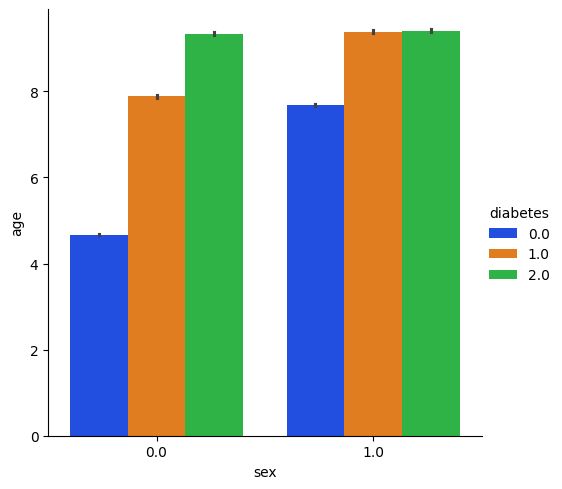

In [122]:
sns.catplot(x='sex',  y='age', data = df,
            palette='bright', kind='bar',hue='diabetes')
plt.show()

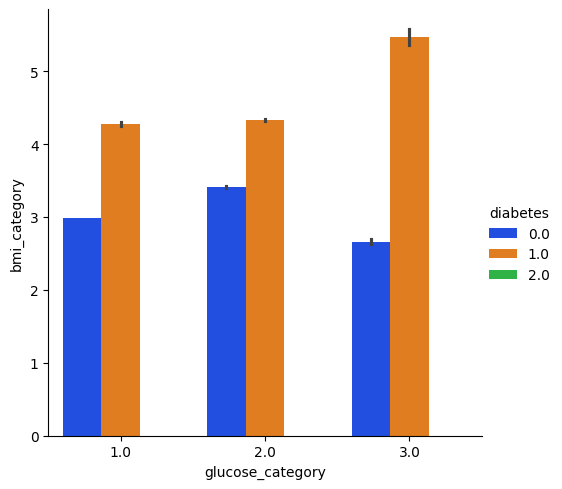

In [123]:
sns.catplot(x='glucose_category',  y='bmi_category', data = df,
            palette='bright', kind='bar',hue='diabetes')
plt.show()

Анализ показателя diabetes


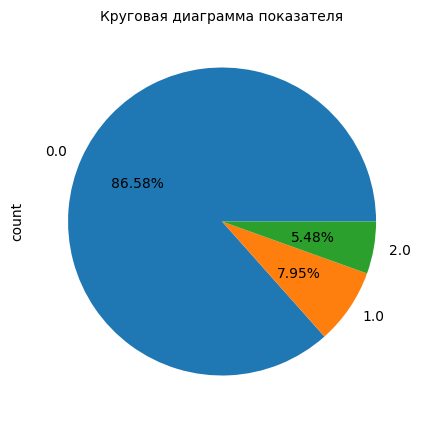

----------------------------------------------------------------------------------------------------
Анализ показателя high_bp


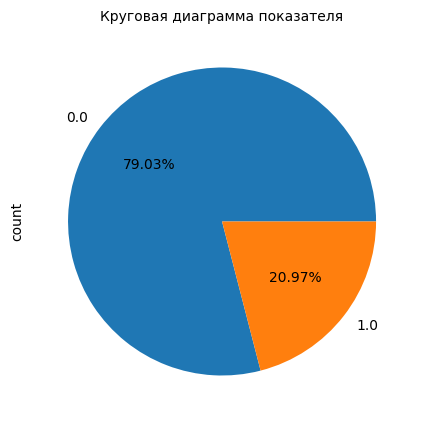

----------------------------------------------------------------------------------------------------
Анализ показателя high_chol


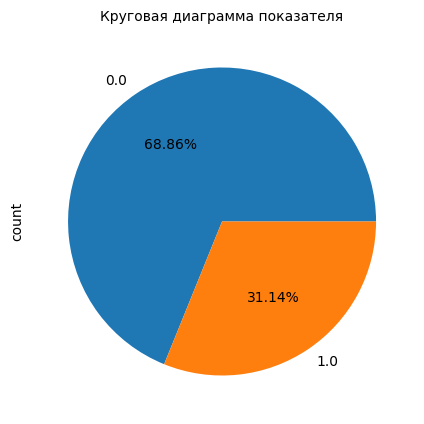

----------------------------------------------------------------------------------------------------
Анализ показателя chol_check


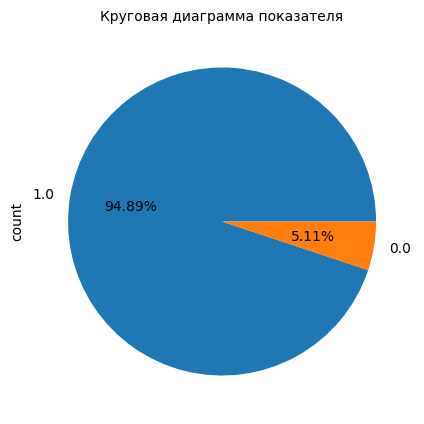

----------------------------------------------------------------------------------------------------
Анализ показателя smoker


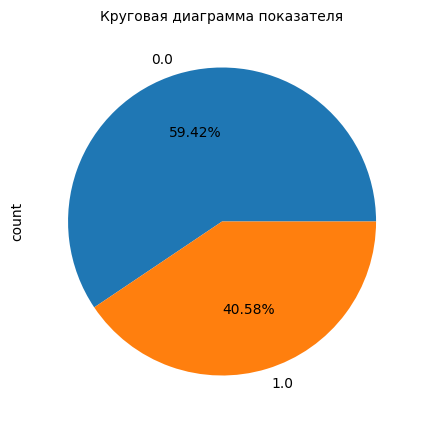

----------------------------------------------------------------------------------------------------
Анализ показателя stroke


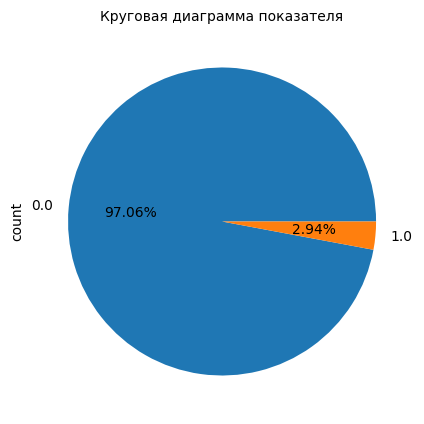

----------------------------------------------------------------------------------------------------
Анализ показателя heart_diseaseor_attack


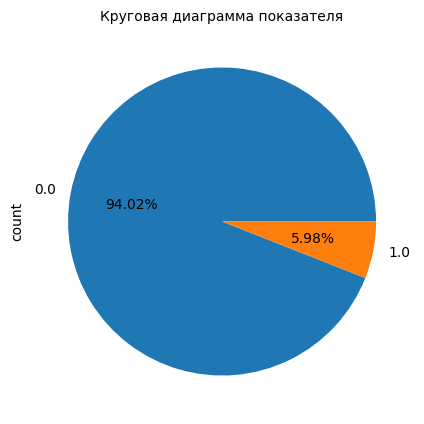

----------------------------------------------------------------------------------------------------
Анализ показателя phys_activity


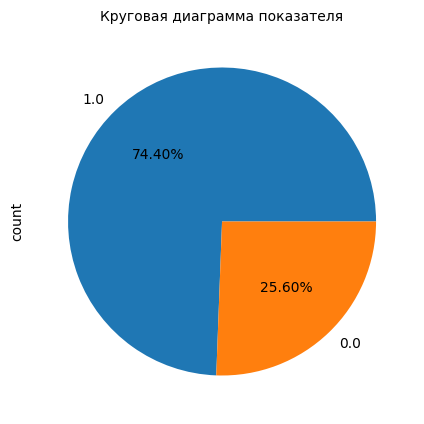

----------------------------------------------------------------------------------------------------
Анализ показателя fruits


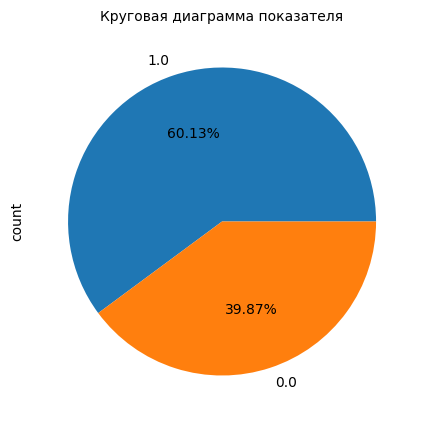

----------------------------------------------------------------------------------------------------
Анализ показателя veggies


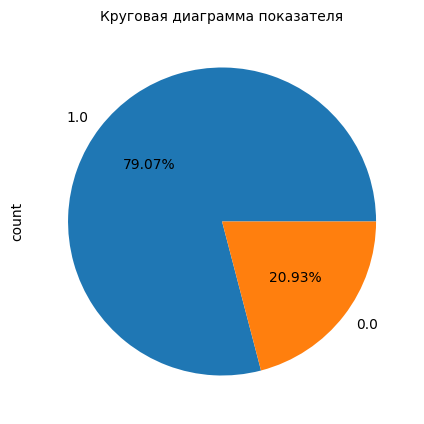

----------------------------------------------------------------------------------------------------
Анализ показателя hvy_alcohol_consump


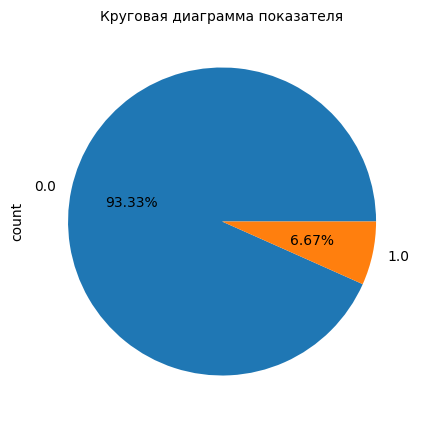

----------------------------------------------------------------------------------------------------
Анализ показателя any_healthcare


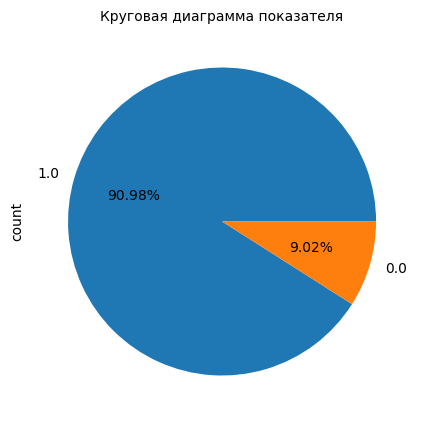

----------------------------------------------------------------------------------------------------
Анализ показателя no_docbc_cost


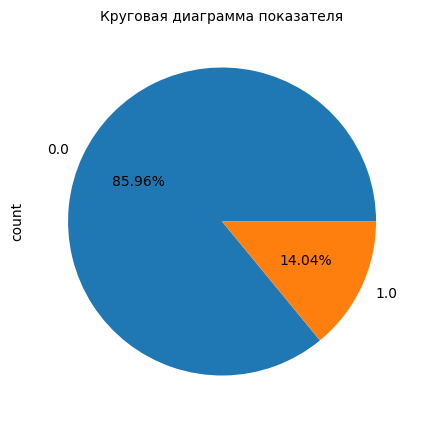

----------------------------------------------------------------------------------------------------
Анализ показателя diff_walk


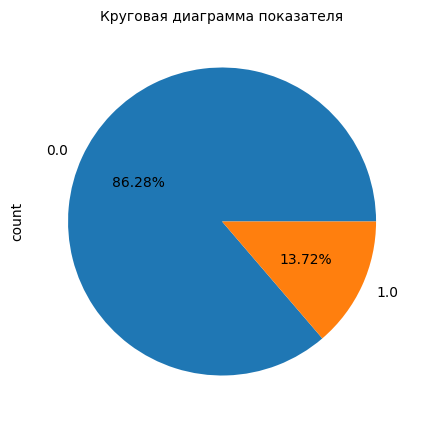

----------------------------------------------------------------------------------------------------
Анализ показателя sex


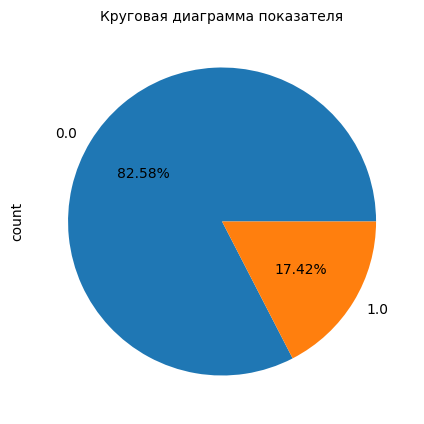

----------------------------------------------------------------------------------------------------
Анализ показателя bp_meds


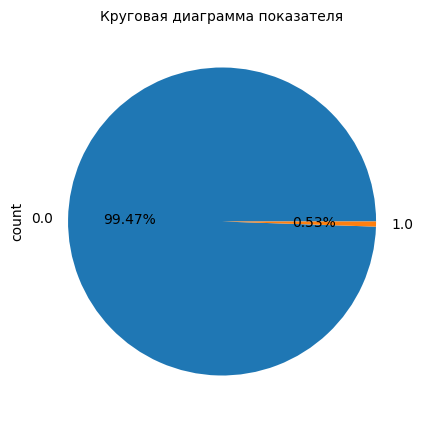

----------------------------------------------------------------------------------------------------
Анализ показателя prevalent_stroke


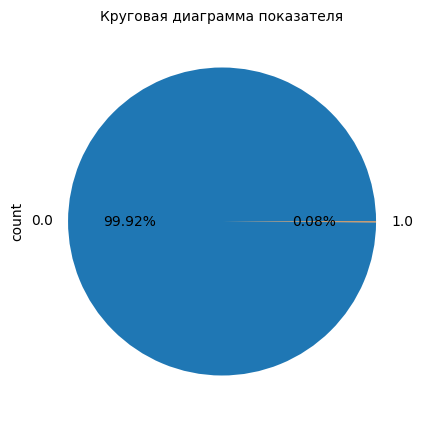

----------------------------------------------------------------------------------------------------
Анализ показателя prevalent_hyp


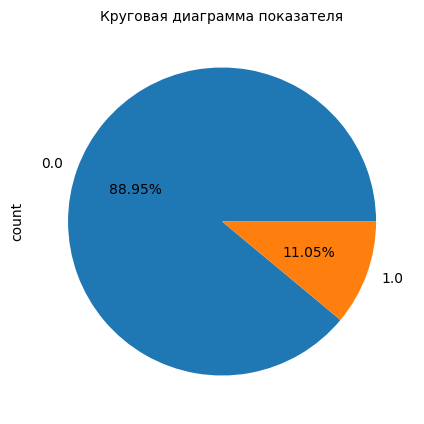

----------------------------------------------------------------------------------------------------


In [124]:
for pie in df_cat_pie:
  print(f'Анализ показателя {pie}')
  analisys_cat_pie(df[pie])
  print('-'*100)

Анализ показателя age


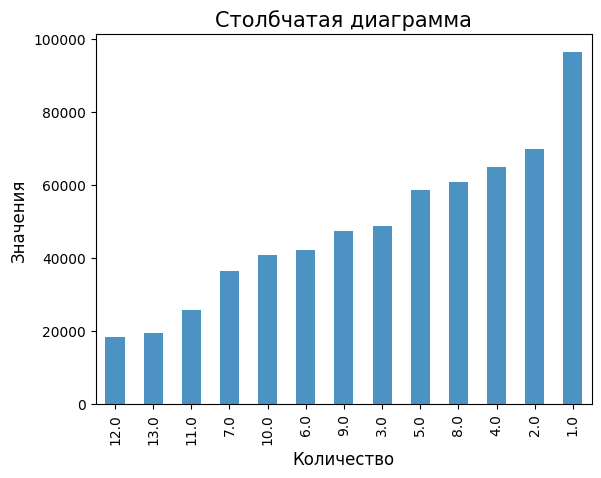

----------------------------------------------------------------------------------------------------
Анализ показателя education


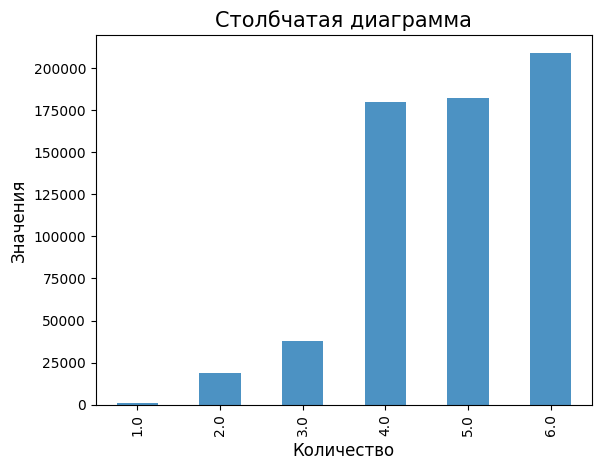

----------------------------------------------------------------------------------------------------
Анализ показателя income


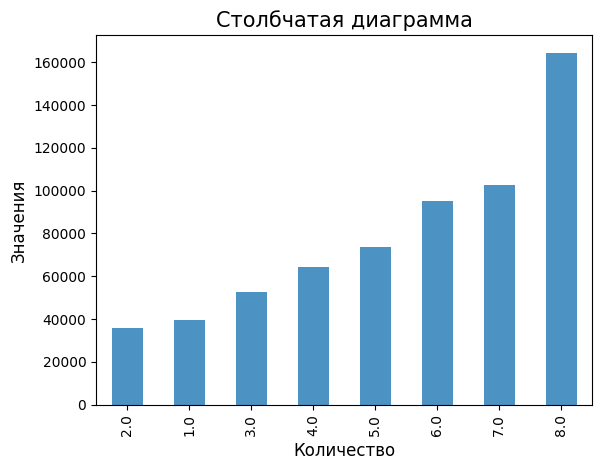

----------------------------------------------------------------------------------------------------
Анализ показателя bmi_category


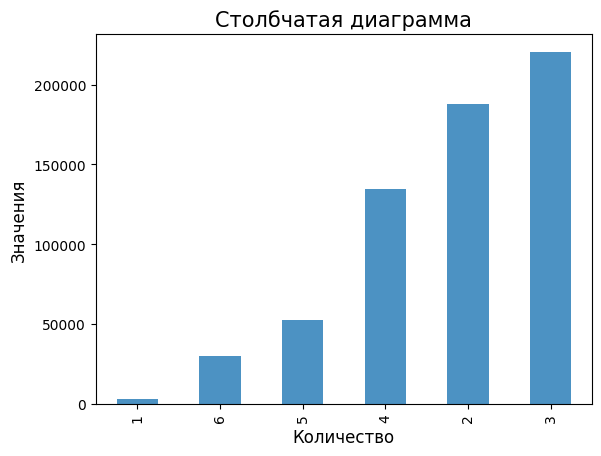

----------------------------------------------------------------------------------------------------
Анализ показателя glucose_category


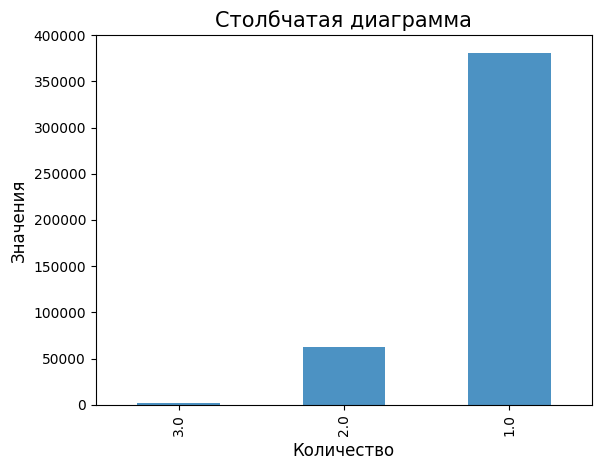

----------------------------------------------------------------------------------------------------
Анализ показателя gen_hlth


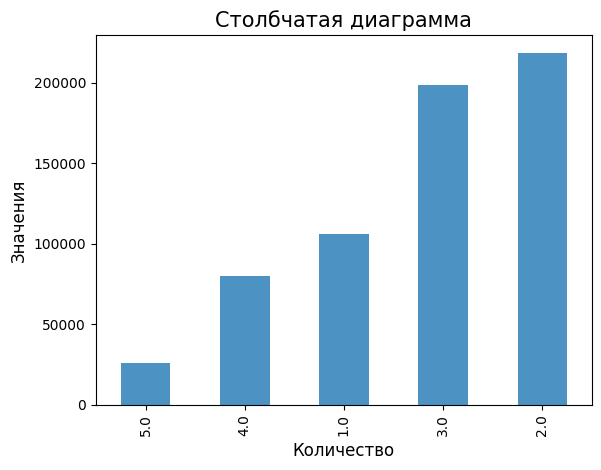

----------------------------------------------------------------------------------------------------


In [125]:
for cat in df_cat:
  print(f'Анализ показателя {cat}')
  analisys_cat_plot(df[cat])
  print('-'*100)

Анализ показателя gen_hlth


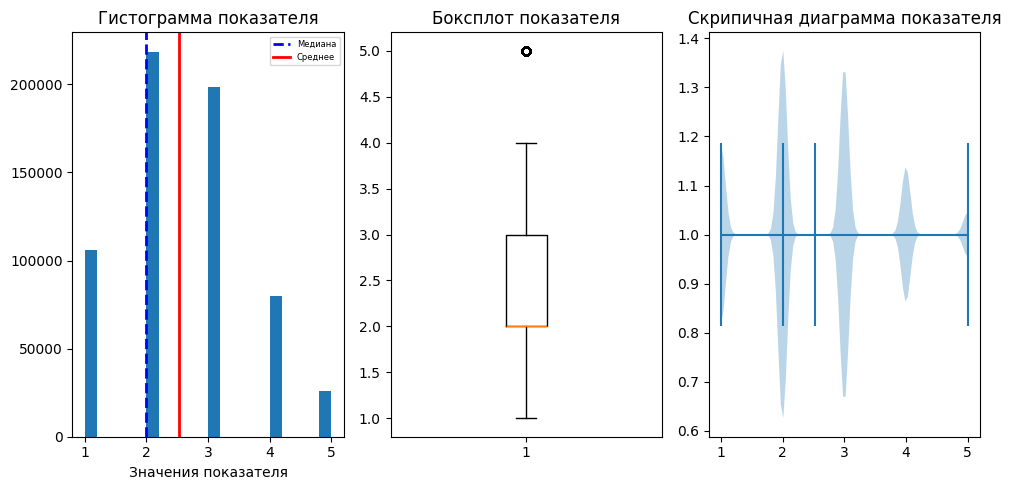

Показатели описательной статистики
count    628872.000000
mean          2.525783
std           1.043208
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: gen_hlth, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя ment_hlth


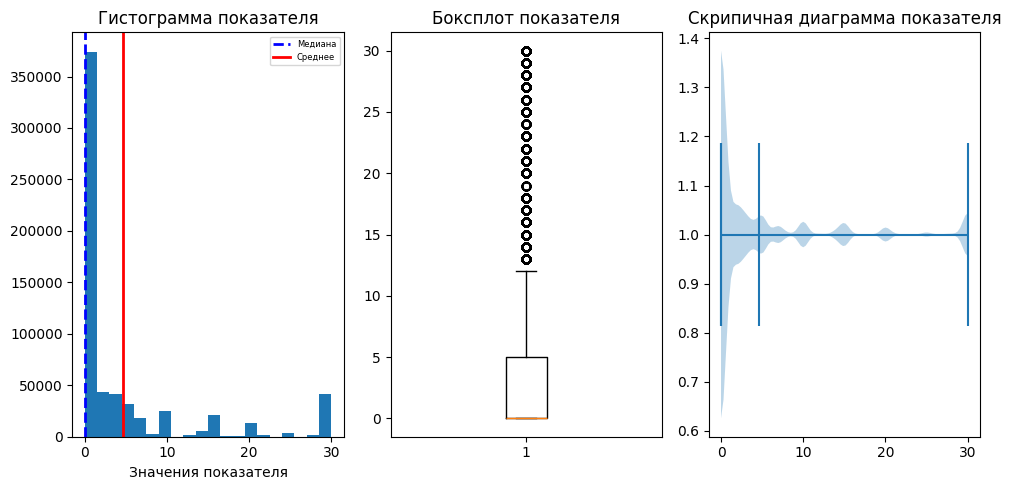

Показатели описательной статистики
count    628872.000000
mean          4.672466
std           8.459096
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          30.000000
Name: ment_hlth, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя phys_hlth


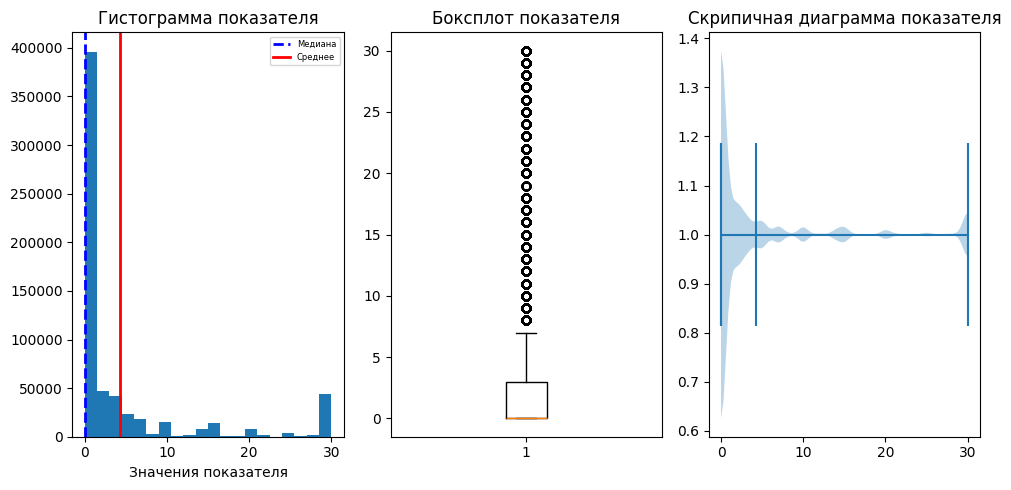

Показатели описательной статистики
count    628872.000000
mean          4.298490
std           8.427087
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: phys_hlth, dtype: float64
----------------------------------------------------------------------------------------------------


In [126]:
for num in df_num:
  print(f'Анализ показателя {num}')
  analisys_num(df[num])
  print('-'*100)

Анализ показателя pregnancies


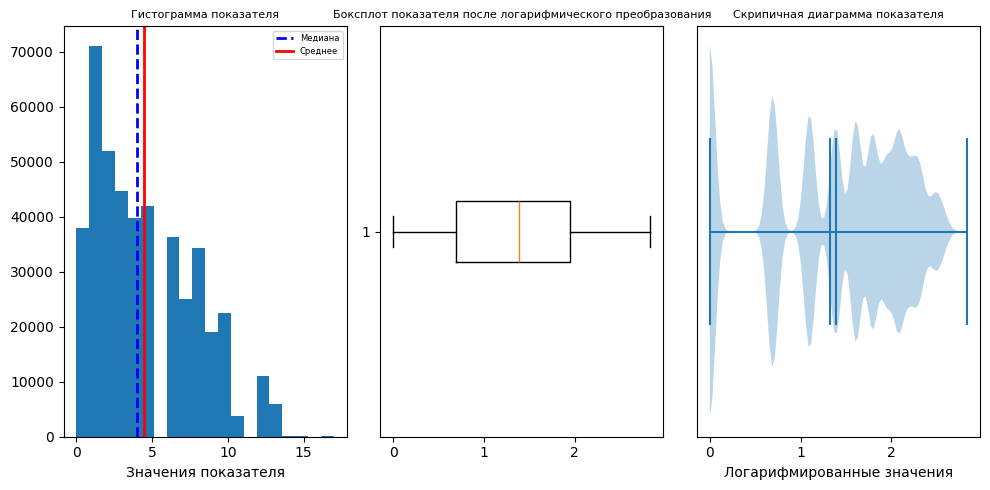

Показатели описательной статистики
count    445529.000000
mean          4.485775
std           3.368076
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          17.000000
Name: pregnancies, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя skin_thickness


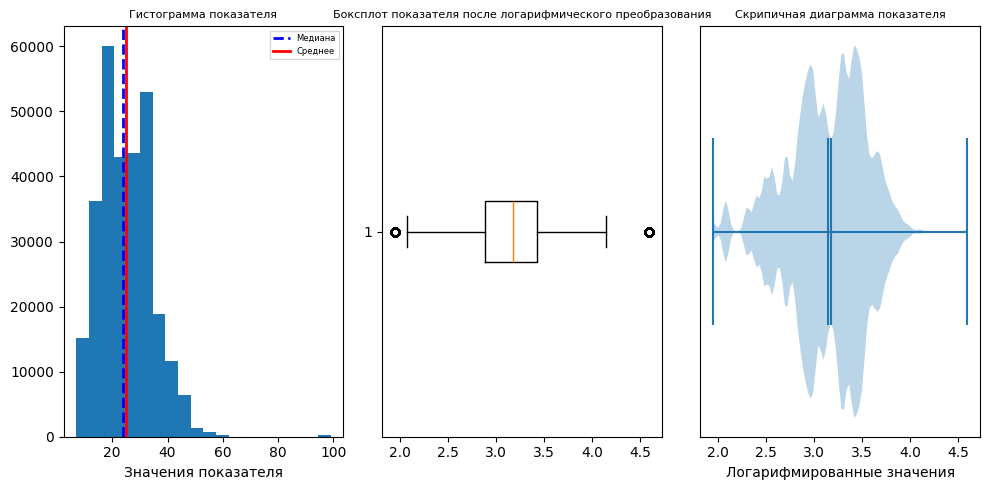

Показатели описательной статистики
count    290442.000000
mean         24.898141
std           9.343546
min           7.000000
25%          18.000000
50%          24.000000
75%          31.000000
max          99.000000
Name: skin_thickness, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя insulin


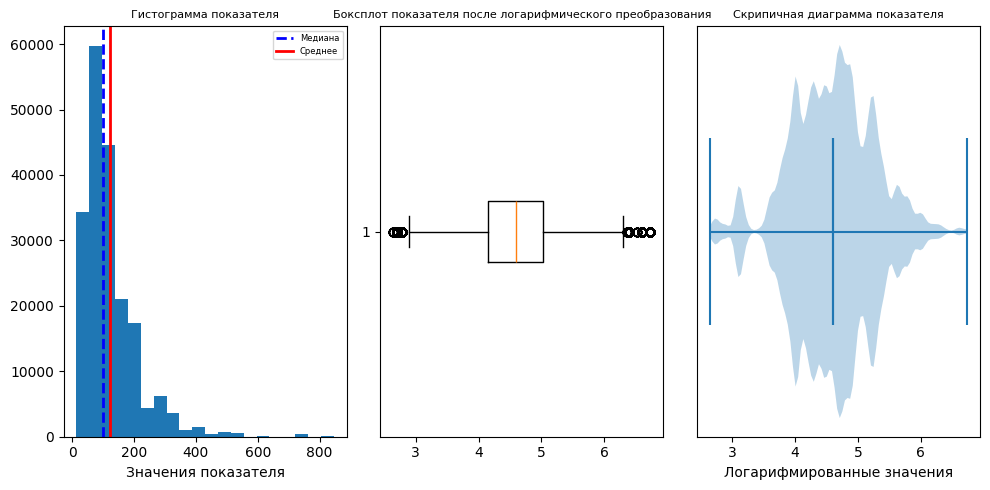

Показатели описательной статистики
count    196447.000000
mean        123.091892
std          90.707663
min          14.000000
25%          64.000000
50%         100.000000
75%         152.000000
max         846.000000
Name: insulin, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя diabetes_pedigree_function


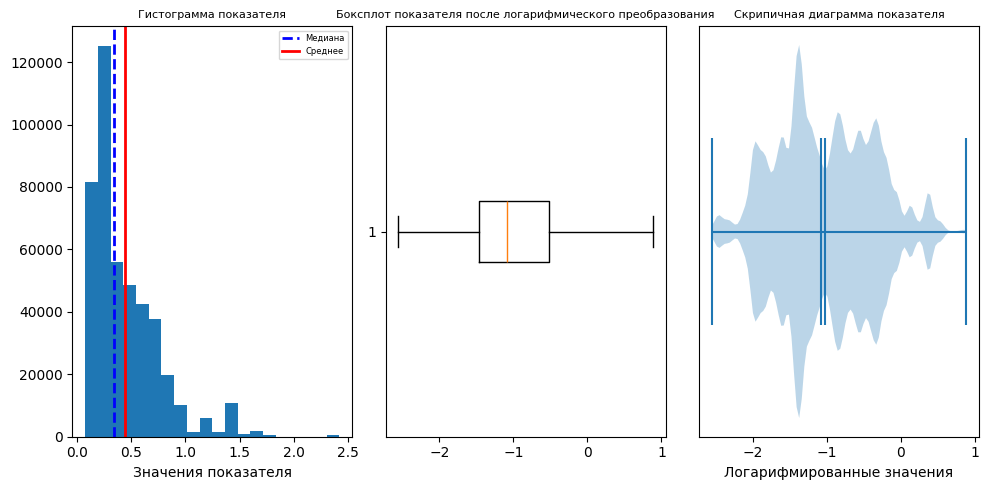

Показатели описательной статистики
count    445529.000000
mean          0.446551
std           0.316704
min           0.078000
25%           0.231000
50%           0.340000
75%           0.595000
max           2.420000
Name: diabetes_pedigree_function, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя cigs_per_day


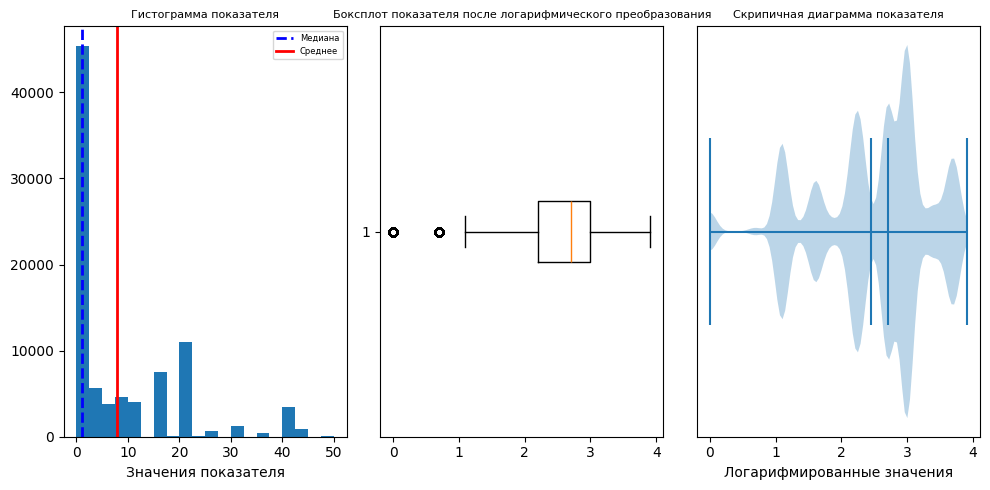

Показатели описательной статистики
count    88844.000000
mean         7.954403
std         11.110812
min          0.000000
25%          0.000000
50%          1.000000
75%         15.000000
max         50.000000
Name: cigs_per_day, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя tot_chol


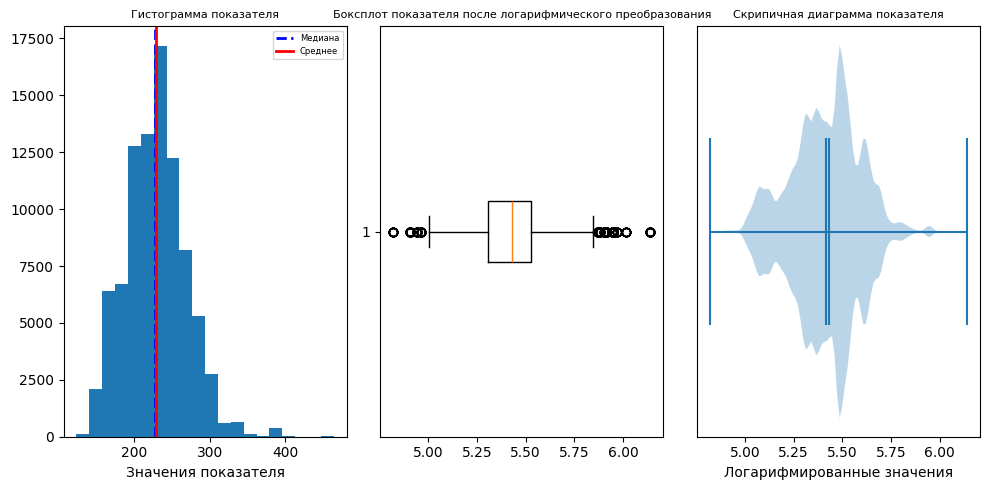

Показатели описательной статистики
count    88910.000000
mean       228.861455
std         40.126596
min        124.000000
25%        202.000000
50%        228.000000
75%        251.000000
max        464.000000
Name: tot_chol, dtype: float64
----------------------------------------------------------------------------------------------------
Анализ показателя heart_rate


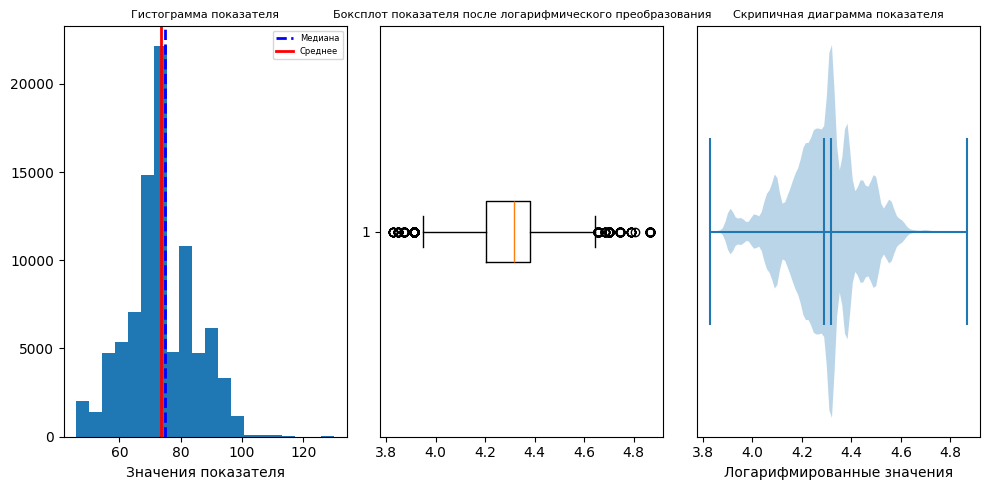

Показатели описательной статистики
count    89074.000000
mean        73.634798
std         10.944722
min         46.000000
25%         67.000000
50%         75.000000
75%         80.000000
max        130.000000
Name: heart_rate, dtype: float64
----------------------------------------------------------------------------------------------------


In [127]:
for num in df_num_2:
  print(f'Анализ показателя {num}')
  analisys_num_2(df[num])
  print('-'*100)

После объединения в датафрейме теперь больше представительниц женского пола, но при этом соотношение курящих и не курящих почти не изменилось. Как было описано выше: основная часть опрошенных ведут здоровый образ жизни, редко обращаются за медицинской помощью по причине заболеваний, не имеют лишнего веса и находятся в возрасте 59-65 лет.

Рассмотрим, изменились ли корреляционные связи после ввода новых факторов.

In [128]:
num_column = ['gen_hlth', 'ment_hlth', 'phys_hlth',
              'pregnancies', 'skin_thickness', 'insulin',
              'diabetes_pedigree_function','cigs_per_day',
              'tot_chol', 'heart_rate']

interval columns not set, guessing: ['diabetes', 'high_bp', 'high_chol', 'chol_check', 'smoker', 'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education', 'income', 'bmi_category', 'pregnancies', 'skin_thickness', 'insulin', 'diabetes_pedigree_function', 'glucose_category', 'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'tot_chol', 'heart_rate']


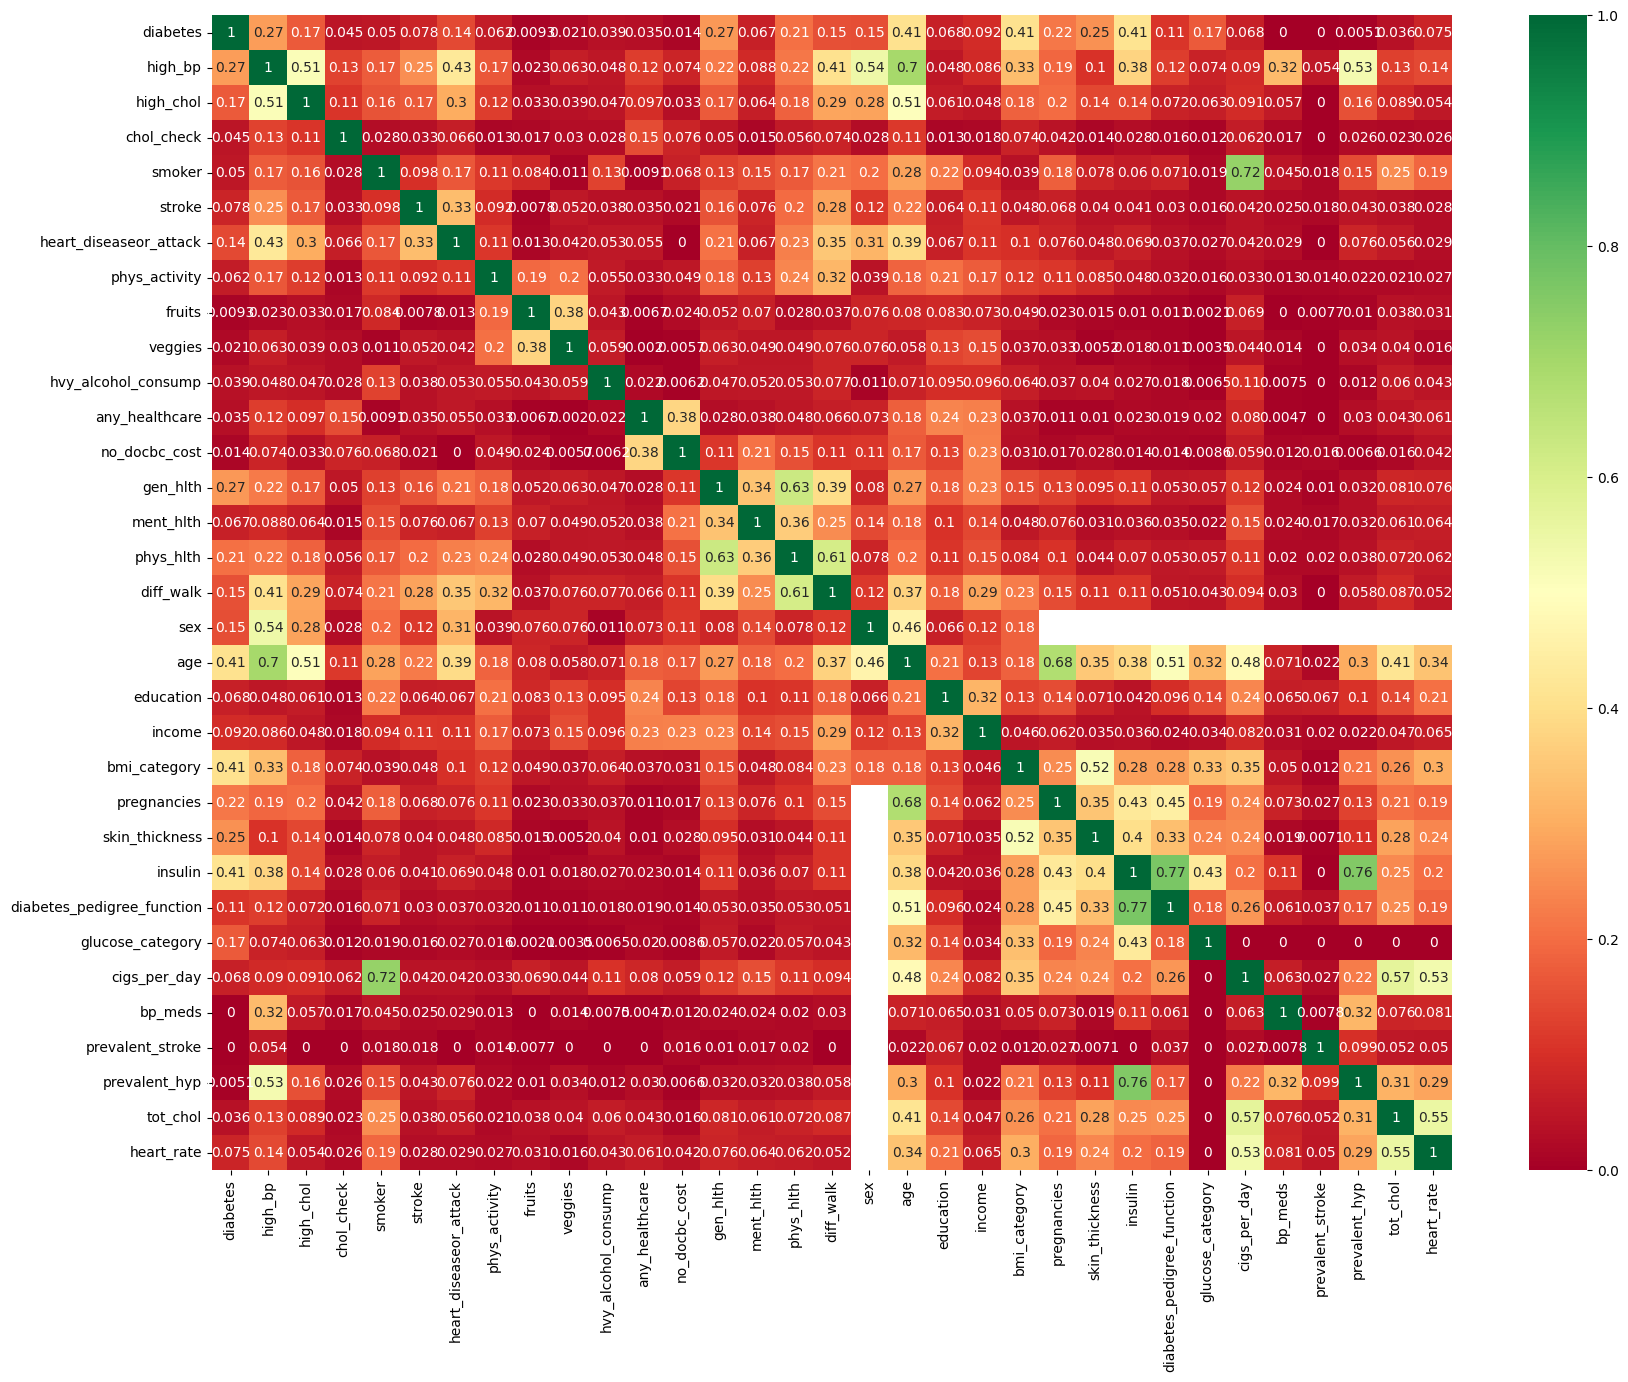

CPU times: user 1min 7s, sys: 1.92 s, total: 1min 9s
Wall time: 2min 31s


In [129]:
%%time
corr_matrix_df = df.phik_matrix()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix_df, annot=True, cmap='RdYlGn')
plt.show()

Как видно, есть показатели с 0 корреляцией и корреляцией менее 0.1 (не округляются до 0.1). Удалим их из датафрема.

In [130]:
df.drop(columns=['fruits', 'veggies','hvy_alcohol_consump',
                 'any_healthcare','bp_meds', 'prevalent_stroke',
                 'prevalent_hyp', 'tot_chol','heart_rate', 'no_docbc_cost'], inplace=True)

interval columns not set, guessing: ['diabetes', 'high_bp', 'high_chol', 'chol_check', 'smoker', 'stroke', 'heart_diseaseor_attack', 'phys_activity', 'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education', 'income', 'bmi_category', 'pregnancies', 'skin_thickness', 'insulin', 'diabetes_pedigree_function', 'glucose_category', 'cigs_per_day']


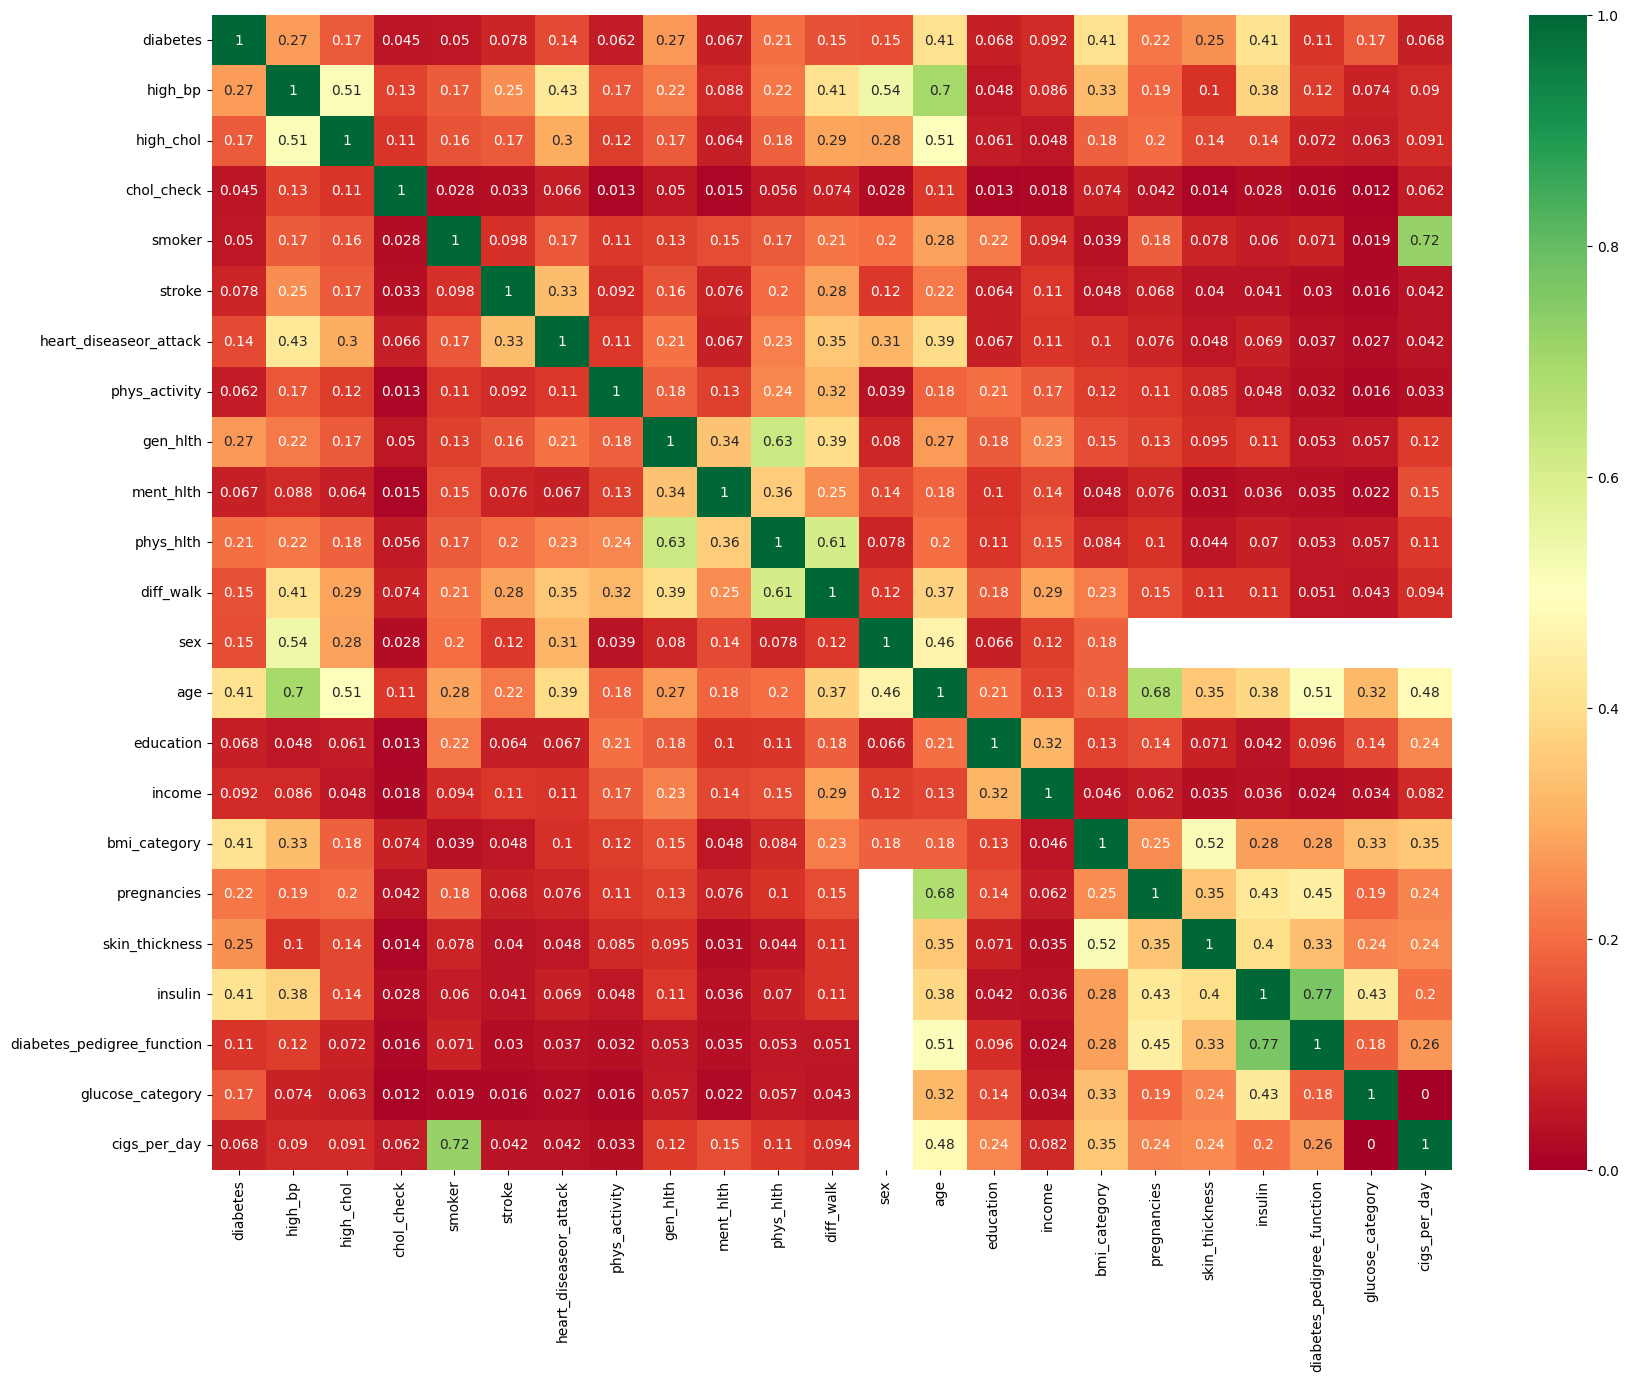

CPU times: user 33.3 s, sys: 1.03 s, total: 34.3 s
Wall time: 1min 10s


In [131]:
%%time
corr_matrix_df2 = df.phik_matrix()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix_df2, annot=True, cmap='RdYlGn')
plt.show()

###Выводы по анализу объединенного файла

После объединения всех датасетов можно сделать следующие выводы:

1. Большая часть опрошенных ведет здоровый образ жизни и в общем имеют хорошее физическое здоровье.

2. Наличие в питании овощей и фруктов и  курение вносят малый вклад в развитие диабета.

3. Высокое давление и высокая концентрация холестерина в крови может быть связана с диабетом, но имеет при этом слабую корреляцию.

4. Из всех факторов сильнее всего с диагнозом связаны индекс массы тела(0.41), возраст(0.41) и содержание инсулина (0.41). Слабая корреляция между глюкозой и диабетом, найденная ранее, подтверждена.

То есть инсулин в крови является предиктором для постановки диагноза диабет. А масса тела и возраст могут способстовать развитию этого диагноза.

5. Слабая корреляция подтверждена для взаимосвязи диабет-генетическая прерасположенность.

7. Так же отмечено, что в данных есть преобладание мужчин с диабетом.

In [132]:
print('Код не упал!')

Код не упал!
